In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from tqdm import tqdm


# x_code is x_phys/dt in 2 differente ways
# 1. when dt=1, m=m_phys -----> x_normcode=x_physical/1
# 2. when dt=0.1=m, m_phys=1 -----> x_code=x_physical/dt ----->x_code*dt=x_physical (for theoretical or code calculations)
# also x_code=x_physical/dt=x_normcode/dt this is 2. with 1.

# As de distance is defined in terms of dt (x=x_fisica/dt)
# and m=mfisica*dt is taken as the efective lattice spacing if dt=1 interchange with the mfisica so that --->dt=m<---- (effective lattice spacing) and mfisica=1
# As in our code dt_code=1, x needs to be rescaled so that x = x2EV/dt_lattice, same applies for the anallytical solution
# x_code=x_fisico/1 ----> x_paper=x_fisico/dt_lattice=x_code/dt_lattice

"""
#MetropolisHasting
class MetropolisHasting:

  accrate=0
  t_min=
  t_plu=
  i=

  def __init__ (self,Nt,path,h,m,w):
    self.s_new=s_new
    self.s_old=s_old

    self.xpath_new=xpath_new
    randm=np.array(2*Nt)
    Index=np.array(Nt)

path=np.array(1)
"""

"""
# Quantum Harmonic Oscillator Lagrangian
def lagrangian_qho(x, m, omega):
    kinetic = 0.5 * m * (np.diff(x)/dt)**2
    potential = 0.5 * m * omega**2 * x**2
    return kinetic - potential

phi=np.zeros(N) #Init cont field=number of lattice points
# QFT Scalar Field Theory Lagrangian
def lagrangian_qft(phi, m, lambda_, lattice_spacing):
    kinetic = 0.5 * np.sum((np.roll(phi, 1, axis=0) - phi)**2)
    mass_term = 0.5 * m**2 * np.sum(phi**2)
    interaction = lambda_ / 4! * np.sum(phi**4)
    return kinetic - mass_term - interaction
"""
def ExpectValX24(Nt,w,m):
  R=1+(w**2)/2-w*(1+(w**2)/4)**(1/2)
  alfa=(1+R**Nt)/(1-R**Nt)
  x2EV=(1/(2*m*w*(1+(w**2)/4)**(1/2)))*alfa
  x4EV=3*x2EV**2
  #print(x4EV)
  #x4EV2=(3/(2*m*w)**2*(1+(w**2)/4))*alfa**2
  #print(x4EV2)

  # 2. when dt=0.1=m, m_phys=1 -----> x_theo=x_physical/dt ----->x_theo*dt=x_physical (for theoretical or code calculations)

  return x2EV*w**2, x4EV*w**4

####### MonteCarlo Estimate Calculation #######
def E_MCX2(x):
    Emc=np.sum(x**2)/len(x)
    return Emc

def E_MCX1(x):
    Emc=np.sum(x)/len(x)
    return Emc

def E_MCX3(x):
    Emc=np.sum(x**3)/len(x)
    return Emc

def E_MCX4(x):
    Emc=np.sum(x**4)/len(x)
    return Emc

#MetropolisHastings
def MetropolisHS(Nt,path,h,m,w): #path (array) with Nt sites

  accrate=0
  #t=0
  #tmin=0
  #tplu=0
  #i=
  #s_new=0#s_new
  #s_old=(1/2)*m*(path[tplu]-path[t])**2 + (1/2)*m*(path[t]-path[tmin])**2 + (1/2)*m*w*(path[t])**2 #current action value

  #xpath_new=xpath_new
  randm=np.zeros(2*Nt)
  index=np.zeros(Nt)
  #path=np.array(1)
  dt=np.zeros(Nt)
  x2EV=np.zeros(Nt)
  x4EV=np.zeros(Nt)
  Emc=np.zeros(Nt)

  #specify the random site visiting order
  for i in range(0,Nt-1,1):
    index[i]=int(math.floor(Nt*np.random.rand())) #an array of random "times", [0,Nt]
  #index=math.floor(Nt*np.random.rand(Nt)) #an array of random "times", [0,Nt]

  #produces an array of uniform [0,1] random numbers
  #for i in range(0,2*Nt,1):
  #  randm[i]=np.random.rand()
  randm=np.random.rand(2*Nt)

  for i in range(0,Nt-1,1): #update the path
    #dt=1
    t=int(index[i]) # a site to visit, randomly selected
    #print(t)
    tmin=(t+(Nt-1)) % Nt #periodic conditions
    tplu=(t+(1)) % Nt
    #dt[t]=tplu-tmin
    #print(dt[t])
    xpath_new=path[t]+h*(randm[i]-0.5) #propose new value for path[t]
    #dt[t]=xpath_new-path[t]??
    #m=m*dt
    #w=w*dt

    s_old= (1/2)*m*(path[tplu]-path[t])**2 + (1/2)*m*(path[t]-path[tmin])**2 + (1/2)*m*w**2*(path[t])**2 #current action value
    s_new= (1/2)*m*(path[tplu]-xpath_new)**2 + (1/2)*m*(xpath_new-path[tmin])**2 + (1/2)*m*w**2*(xpath_new)**2 #current action value

    #1 Metropolis-Hastings
    #If the action is lowered by the proposed change, e−snew +sold > 1, then the change is mad
    #If snew > sold, the use of the random number, uniformly distributed in the interval [0, 1[, ensures that the proposal is accepted
    #with the probability e−snew +sold .
    if (randm[Nt+i] < np.exp(-s_new+s_old)): #exp-s_n+s_o is the ratio of probabilities
    #if (s_new > s_old) and ( np.exp(-s_new+s_old) <= randm[Nt+i] ): #Landau, Paez
      #print("xpath_new-path[t]")
      path[t]=xpath_new
      #dt[t]=xpath_new-path[t]???
      accrate=accrate +1/Nt #adjustment of acceptance rate? update accordingly



    """
    #2 Metropolis is a particular case of M-H
    ds=s_new-s_old

    F=−kB​Tnp.log(np.exp(-s_new+s_old)) #-np.log(Prob xnew/Prob xold)
    ds=-dF/dT #or
    ds=-np.log(Prob xnew/Prob xold)

    if d_S<0:
    phi.append(phi_p)

    elif d_S>0:
    x = np.random.random()

      if x<expint(phi_p,mu,c)/expint(phi[-1],mu,c):
        phi.append(phi_p)

      elif x>expint(phi_p,mu,c)/expint(phi_0,mu,c):
        pass
    """

    x2EV[i], x4EV[i]=1,2 #ExpectValX24(Nt,w,m)
  idrate=0.8
  h=h*accrate/(idrate) #adjust target interval for future use #step size h is adjusted based on the acceptance rate

  ####### MonteCarlo Estimate Calculation #######
  #print(path)
  Emc2=E_MCX2(path)
  Emc1=E_MCX1(path)
  Emc3=E_MCX3(path)
  Emc4=E_MCX4(path)
  return path,h, x2EV, x4EV,dt, index, Emc1, Emc2, Emc3, Emc4

#we run a series of simulations, each with a smaller efective lattice spacing (that is, a smaller value of
#~m) and a greater value of Nt than the previous, such that the product Nt ~m is fxed.
#reduccion de varianza?

"""
#Adjustment of Acceptance Rate:
#accrate keeps track of the acceptance rate.
#It is updated by adding 1/N
 (where N
 is the total number of iterations) when an acceptance occurs.
#Final Step:
#The step size h is adjusted based on the acceptance rate for future iterations.
"""

'\n#Adjustment of Acceptance Rate:\n#accrate keeps track of the acceptance rate.\n#It is updated by adding 1/N\n (where N\n is the total number of iterations) when an acceptance occurs.\n#Final Step:\n#The step size h is adjusted based on the acceptance rate for future iterations.\n'

In [2]:
###### two-point function #######


def twopf(path,deltat):

  Nt=len(path)
  G=np.zeros(len(deltat))
  for k in range(0,len(deltat)-1,1):
    sum=0
    print("deltatk",deltat[k])
    for i in range(0,Nt-1,1):
      for j in range(0,Nt-1,1):
        #print(i,j)
        #if ((j-i)%Nt-dt[i]<=0.01):
        if ((j-i)%Nt==deltat[k]):
          #print("esta",i,j)
          sum=sum+(path[i])*(path[j])
    G[k]=sum/Nt
    #print(G[i])
  return G

#Calculate the correlation function
def correlation_function(path, deltat):#correlation_function(path, deltat):
  N_tau=len(path)
  G=np.zeros(len(deltat))
  for tau in range(N_tau):
      for j in range(0,len(deltat),1): #j is Delta_tau
          #print(tau,deltat[j])
          # Periodic boundary conditions
          tau_prime = (tau + deltat[j]) % N_tau
          G[j] += (path[tau]) * (path[tau_prime])/N_tau
  return G

"""
#two-point function
def twopf(path,dt):
  sum=0
  G=np.zeros(Nt)
  for i in range(0,Nt-1,1):
    for j in range(0,Nt-1,1):
      if ((j-i)%Nt==dt[i]):
        sum=sum+path[i]*path[j]
    G[i]=(1/Nt)*sum
    #print(G[i])
  return G
"""

def twopf2A(path,t,dt):
  e=1#correlation time
  T=t[-1]#Final tim
  A=2
  G=A*np.exp(-dt/e) + A*np.exp(-(T-dt)/e)
  return G

def EffectiveMass(path,deltat):
  einv=(1/2)*np.log(correlation_function(path,(deltat-1))/correlation_function(path,(deltat+1)))
  for e in range(0,len(einv),1):
    if np.isnan(einv[e]):
      #print("entreeeeeeeeeee")
      einv[e]=0
  return einv

##Main to perform many statistical measurements through generating paths


Trial run for Thermalization

100%|██████████| 500/500 [07:12<00:00,  1.16it/s]


$\langle \hat{X}^2 \rangle$ average 48.6555851616026


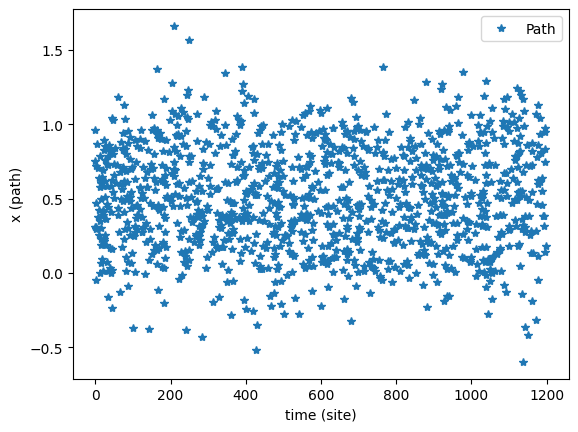

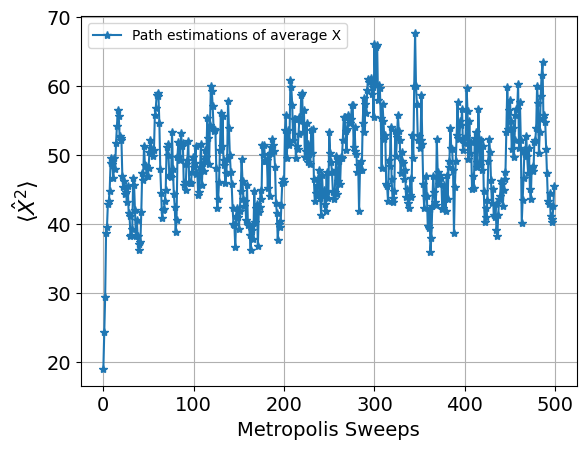

In [52]:
#######  Main to perform many statistical measurements through generating paths ###############
# Trial run for Thermalization

#Simulation parameters
LatticeSpacing=0.1

dtt=LatticeSpacing
m=LatticeSpacing
w=LatticeSpacing
Nt=1200#1200
Nsweeps=500 #1000 #1000 or 10000
h=0.8 #free parameter accounting for acceptance rate


path=np.zeros(Nt) #cold start #initialize path ("seed")
path=np.random.rand(Nt) #hot start
#observables and correlations  statistically measured from many configurations
deltat=np.arange(1,100,1) # independet variable of the correlation measurements
EmcX1=np.zeros(Nsweeps)
EmcX2=np.zeros(Nsweeps)
EmcX3=np.zeros(Nsweeps)
EmcX4=np.zeros(Nsweeps)
G=np.zeros((Nsweeps, len(deltat)))
G2=np.zeros((Nsweeps, len(deltat)))
einv=np.zeros((Nsweeps, len(deltat)))

# to graph the path
path,h, x2EV, x4EV,dt, index, EmcX1[0], EmcX2[0], EmcX3[0], EmcX4[0] = MetropolisHS(Nt,path,h,m,w)
#plt.plot(Nt,x2EV)
plt.figure(0)
plt.plot(index,path,"*",label="Path")
plt.ylabel("x (path)")
plt.xlabel("time (site)")
#plt.plot(index,h,label="h")
plt.legend()


#remember that in our code dt=1 and m_physical=0.1
#so to get to dt=0.1 and m_physical=1 (mathematically equal) we do X_code=X_physical/dt ---> X_code*dt=X_physical :
EmcX2=EmcX2*dtt


# graph EV of x**2
######### Expected values (measurements) ########
cntr=np.zeros(Nsweeps)
for cnt in range(0,len(EmcX2),1):
  cntr[cnt]=cnt
for sweep in tqdm(range(0,Nsweeps,1)): #also one sweep is one montecarlo step per site
  #print(sweep)
  for dis in range(0,100-1,1):
    path,h, x2EV, x4EV,dt, index, EmcX1dis, EmcX2dis, EmcX3dis, EmcX4dis =MetropolisHS(Nt,path,h,m,w)
  path,h, x2EV, x4EV,dt, index, EmcX1[sweep], EmcX2[sweep], EmcX3[sweep], EmcX4[sweep] =MetropolisHS(Nt,path,h,m,w)

plt.figure(10)
#cntr=index??
plt.plot(cntr,EmcX2,"*-",label="Path estimations of average X")
plt.ylabel(r"$\langle \hat{X}^2 \rangle$",fontsize=16)
plt.tick_params(axis="both", which="major", labelsize=14)
plt.tick_params(axis="both", which="minor", labelsize=14)
plt.xlabel("Metropolis Sweeps",fontsize=14)
#plt.plot(index,h,label="h")
plt.grid()
plt.legend()
print(r"$\langle \hat{X}^2 \rangle$ average", np.sum(EmcX2)/len(EmcX2))
plt.savefig("Thermalization.eps")

##Perform many statistical measurements through generating paths

<ipython-input-2-dca827c6dbfb>:56: RuntimeWarning: invalid value encountered in log
  einv=(1/2)*np.log(correlation_function(path,(deltat-1))/correlation_function(path,(deltat+1)))
100%|██████████| 1000/1000 [26:47<00:00,  1.61s/it]


X**2 average 0.4958752543446687
X average -0.014688013656384315
X**3 average -0.02329854766542892
X**4 average 0.7438861757185441


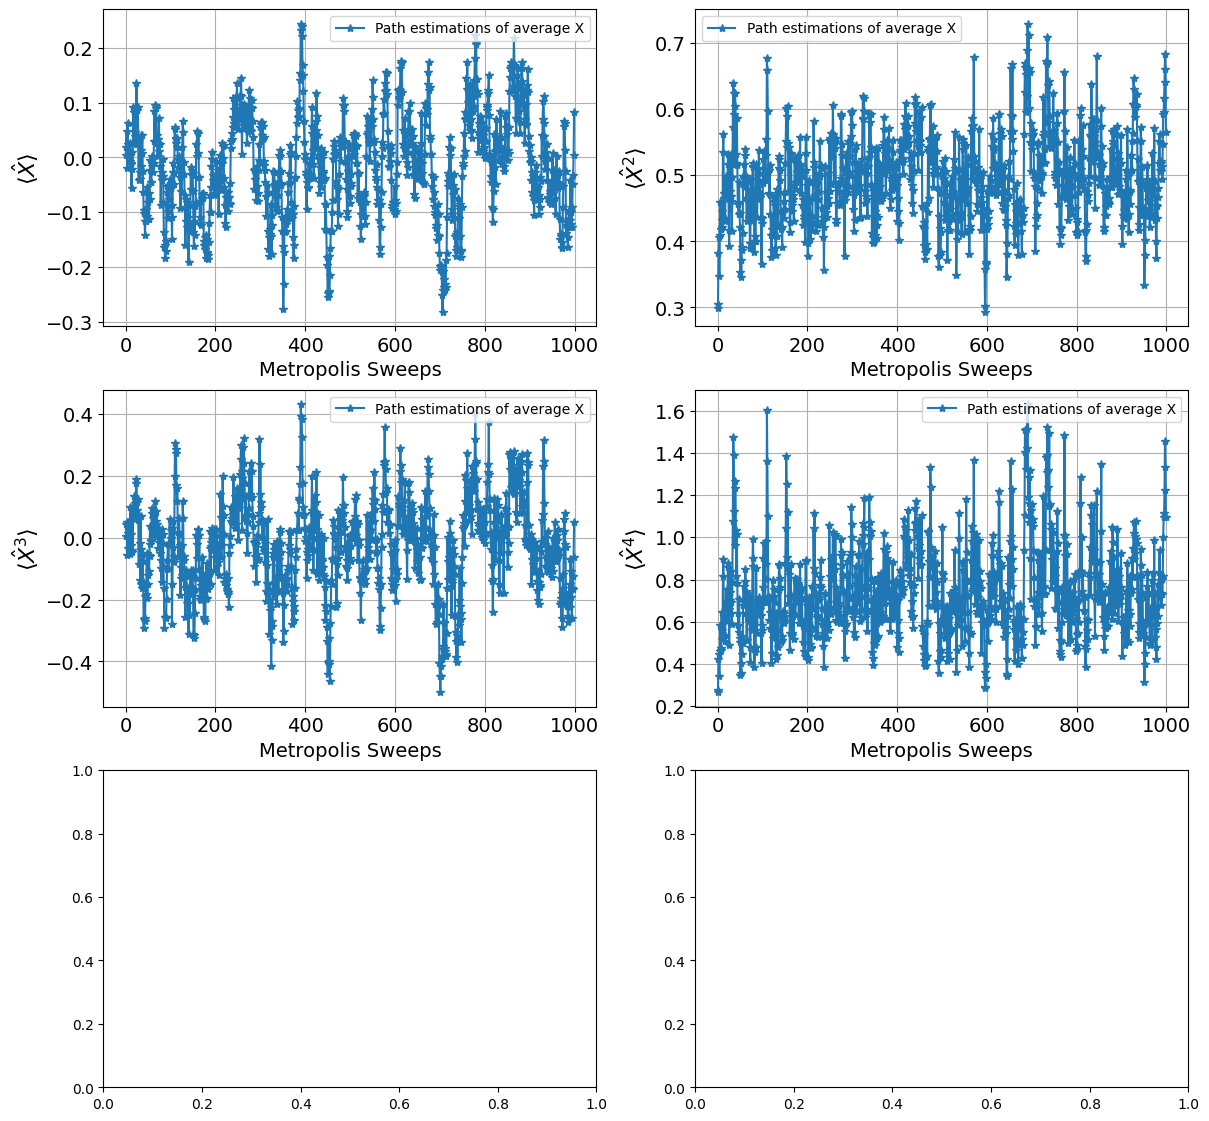

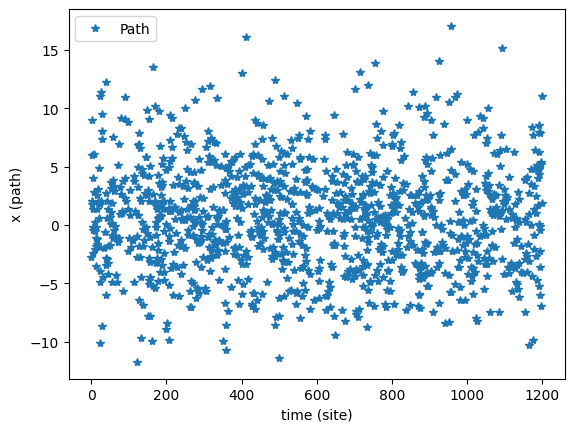

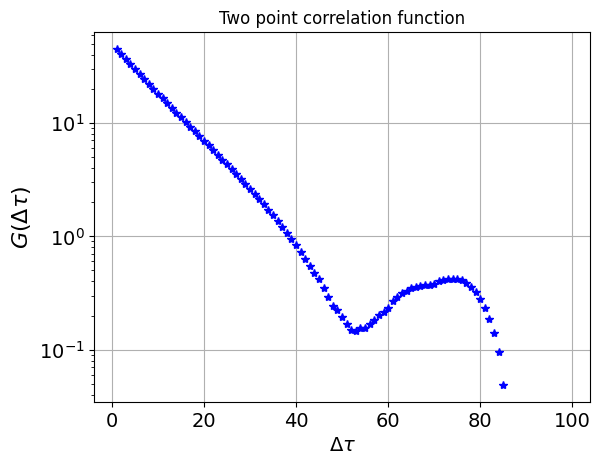

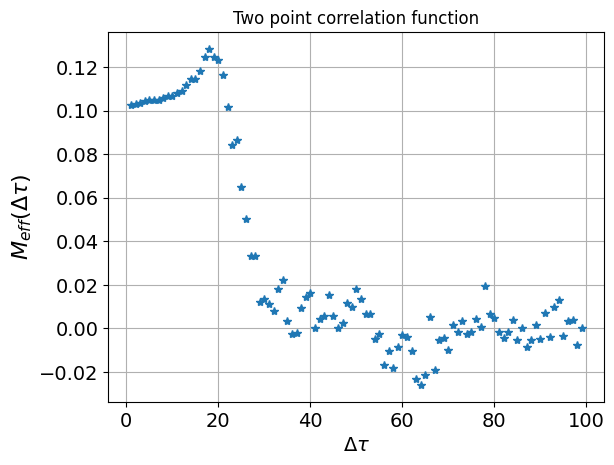

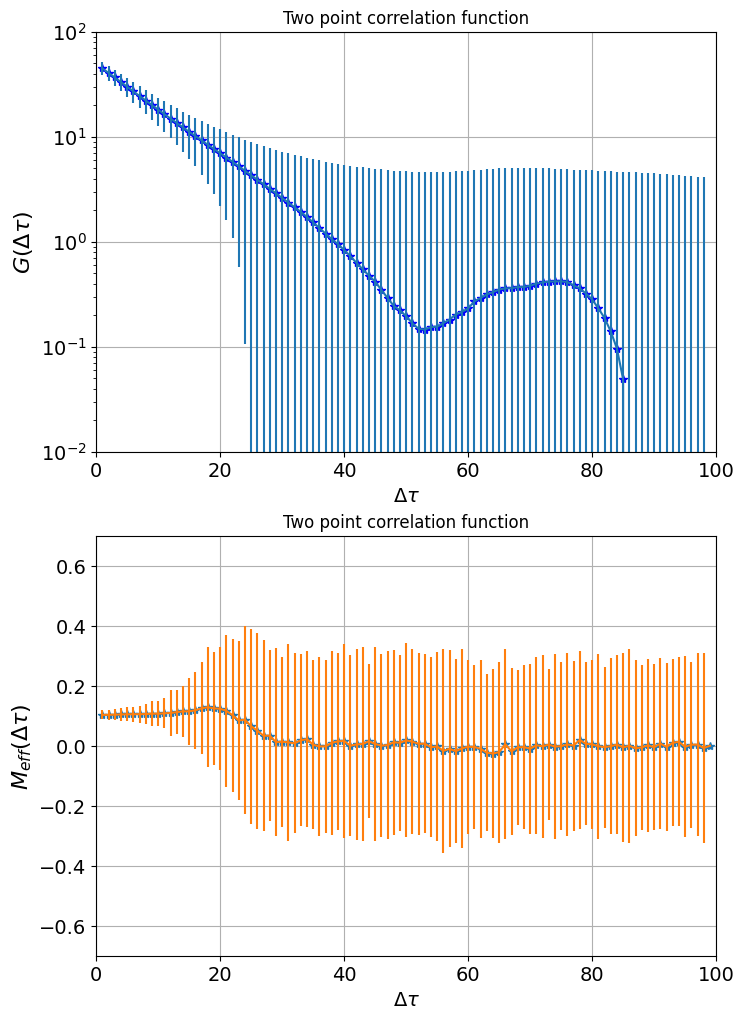

In [3]:
#######  Main to perform many statistical measurements through generating paths ###############

#Simulation parameters
LatticeSpacing=0.1
Nt=1200
Nsweeps=1000 #1000 or 10000
h=0.8 #free parameter accounting for acceptance rate

dtt=LatticeSpacing # Desired Lattice Spacing
m=LatticeSpacing
w=LatticeSpacing

### graph two point correlation and effective mass ####
def AvObs(G): #average observables from different random configurations
  deltat=np.arange(1,100,1)
  AvG=np.zeros(len(deltat))
  AvGSD=np.zeros(len(deltat))
  for ii in range(0,len(deltat)-1,1):
    avSum=0
    avSumSD=0
    #print("deltatii",deltat[ii])
    for jj in range(0,Nsweeps,1):
      avSum=avSum+G[jj][ii]
      #print(G[jj][ii])
    AvG[ii]=avSum/Nsweeps
    for jj in range(0,Nsweeps,1):
      avSumSD=avSumSD+(G[jj][ii]-AvG[ii])**2
      #print(G[jj][ii])
    AvGSD[ii]=np.sqrt(avSumSD/(Nsweeps-1))
  #print(AvG,type(AvG))
  return AvG,AvGSD

def Main(dtt,m,w,Nt,Nsweeps,h):

  path=np.zeros(Nt) #cold start #initialize path ("seed")
  path=np.random.rand(Nt) #hot start
  #observables and correlations  statistically measured from many configurations
  deltat=np.arange(1,100,1) # independet variable of the correlation measurements
  EmcX1=np.zeros(Nsweeps)
  EmcX2=np.zeros(Nsweeps)
  EmcX3=np.zeros(Nsweeps)
  EmcX4=np.zeros(Nsweeps)
  G=np.zeros((Nsweeps, len(deltat)))
  G2=np.zeros((Nsweeps, len(deltat)))
  einv=np.zeros((Nsweeps, len(deltat)))


  # for thermalization
  for dis in range(0,150,1):
    path,h, x2EV, x4EV,dt, index, EmcX1dis, EmcX2dis, EmcX3dis, EmcX4dis =MetropolisHS(Nt,path,h,m,w)
  path,h, x2EV, x4EV,dt, index, EmcX1[0], EmcX2[0], EmcX3[0], EmcX4[0] =MetropolisHS(Nt,path,h,m,w)

  path1=path*dtt
  #two point correlation function and effective mass
  #print("k=0",deltat[0])
  #print(deltat)
  #G[0]=twopf(path1,deltat)
  G2[0]=correlation_function(path, deltat)
  einv[0]=EffectiveMass(path,deltat)

  #plt.plot(Nt,x2EV)
  plt.figure(0)
  plt.plot(index,path,"*",label="Path")
  plt.ylabel("x (path)")
  plt.xlabel("time (site)")
  #plt.plot(index,h,label="h")
  plt.legend()

  """
  dt=np.zeros(Nt)
  for i in range(0,Nt,1):
    dt[i]=dt[i]+i

  print(dt)
  plt.figure(1)
  plt.plot(dt,path,"*",label="Path")
  plt.ylabel("x (path)")
  plt.xlabel("dt")
  #plt.plot(index,h,label="h")
  plt.legend()
  plt.show()

  """

  ######### Expected values (measurements) ########
  cntr=np.zeros(Nsweeps)
  for cnt in range(0,len(EmcX2),1):
    cntr[cnt]=cnt
  for sweep in tqdm(range(0,Nsweeps,1)): #also one sweep is one montecarlo step per site
    #print(sweep)
    for dis in range(0,150-1,1):
      path,h, x2EV, x4EV,dt, index, EmcX1dis, EmcX2dis, EmcX3dis, EmcX4dis =MetropolisHS(Nt,path,h,m,w)
    path,h, x2EV, x4EV,dt, index, EmcX1[sweep], EmcX2[sweep], EmcX3[sweep], EmcX4[sweep] =MetropolisHS(Nt,path,h,m,w)

    #two point correlation function and effective mass
    path1=path*dtt
    #print("k=0",deltat[0])
    #print(deltat)
    #G[sweep]=twopf(path1,deltat)
    G2[sweep]=correlation_function(path, deltat)
    einv[sweep]=EffectiveMass(path,deltat)
    #print("einv",einv)

  #print(G2)

  ###### graph Expected value of physical position powers #######################

  #remember that in our code dt=1 and m_physical=0.1
  #so to get to dt=0.1 and m_physical=1 (mathematically equal) we do X_code=X_physical/dt ---> X_code*dt=X_physical :
  EmcX1=EmcX1*dtt
  EmcX2=EmcX2*(dtt**2)
  EmcX3=EmcX3*(dtt**3)
  EmcX4=EmcX4*(dtt**4)

  # graph EV of x**2

  #cntr=index??
  ax[0,1].plot(cntr,EmcX2,"*-",label="Path estimations of average X")
  ax[0,1].set_ylabel(r"$\langle \hat{X}^2 \rangle$",fontsize=16)
  ax[0,1].tick_params(axis="both", which="major", labelsize=14)
  ax[0,1].tick_params(axis="both", which="minor", labelsize=14)
  ax[0,1].set_xlabel("Metropolis Sweeps",fontsize=14)
  #plt.plot(index,h,label="h")
  ax[0,1].legend()
  ax[0,1].grid()
  #print(r"$\langle \hat{X}^2 \rangle$ average", np.sum(EmcX2)/len(EmcX2))
  print("X**2 average", np.sum(EmcX2)/len(EmcX2))

  # graph EV of x
  ax[0,0].plot(cntr,EmcX1,"*-",label="Path estimations of average X")
  ax[0,0].set_ylabel(r"$\langle \hat{X} \rangle$",fontsize=16)
  ax[0,0].tick_params(axis="both", which="major", labelsize=14)
  ax[0,0].tick_params(axis="both", which="minor", labelsize=14)
  ax[0,0].set_xlabel("Metropolis Sweeps",fontsize=14)
  #plt.plot(index,h,label="h")
  ax[0,0].legend()
  ax[0,0].grid()
  print("X average", np.sum(EmcX1)/len(EmcX1))

  # graph EV of x**3
  ax[1,0].plot(cntr,EmcX3,"*-",label="Path estimations of average X")
  ax[1,0].set_ylabel(r"$\langle \hat{X}^3 \rangle$",fontsize=16)
  ax[1,0].tick_params(axis="both", which="major", labelsize=14)
  ax[1,0].tick_params(axis="both", which="minor", labelsize=14)
  ax[1,0].set_xlabel("Metropolis Sweeps",fontsize=14)
  #plt.plot(index,h,label="h")
  ax[1,0].legend()
  ax[1,0].grid()
  print("X**3 average", np.sum(EmcX3)/len(EmcX3))

  # graph EV of x**4
  ax[1,1].plot(cntr,EmcX4,"*-", label="Path estimations of average X")
  ax[1,1].set_ylabel(r"$\langle \hat{X}^4 \rangle$",fontsize=16)
  ax[1,1].tick_params(axis="both", which="major", labelsize=14)
  ax[1,1].tick_params(axis="both", which="minor", labelsize=14)
  ax[1,1].set_xlabel("Metropolis Sweeps",fontsize=14)
  #plt.plot(index,h,label="h")
  ax[1,1].legend()
  ax[1,1].grid()
  print("X**4 average", np.sum(EmcX4)/len(EmcX4))
  fig.show()
  fig.savefig("1stgraph.eps")
  fig.savefig("1stgraph")

  ### graph two point correlation and effective mass ####
  #avG=AvObs(G)
  avG2, AvG2SD=AvObs(G2)
  aveinv, AveinvSD=AvObs(einv)

  # slower method
  #plt.figure(2)
  #plt.plot(deltat,avG,"b*",label="2pC")
  #plt.yscale("log")
  #plt.legend()

  plt.figure(3)
  plt.plot(deltat,avG2,"b*")
  #plt.errorbar(deltat,avG2, yerr=AvG2SD,fmt="*")
  plt.yscale("log")
  plt.title("Two point correlation function")
  plt.ylabel(r"$G(\Delta \tau)$",fontsize=16)
  plt.xlabel(r"$\Delta \tau$",fontsize=14)
  plt.tick_params(axis="both", which="major", labelsize=14)
  plt.tick_params(axis="both", which="minor", labelsize=14)
  plt.grid()
  #plt.legend()
  #print(G)
  #print(G2)

  plt.figure(4)
  plt.plot(deltat,aveinv,"*")
  #plt.errorbar(deltat,aveinv,yerr=AveinvSD,fmt="*")
  plt.title("Two point correlation function")
  plt.ylabel(r"$M_{eff}(\Delta \tau)$",fontsize=16)
  plt.xlabel(r"$\Delta \tau$",fontsize=14)
  plt.tick_params(axis="both", which="major", labelsize=14)
  plt.tick_params(axis="both", which="minor", labelsize=14)
  plt.grid()
  #plt.legend()
  plt.show()

  ### with error bars ####


  figs, axs= plt.subplots(2,1, figsize=(8,12))
  axs[0].plot(deltat,avG2,"b*")
  axs[0].errorbar(deltat,avG2, yerr=AvG2SD)
  axs[0].set_yscale("log")
  axs[0].set_title("Two point correlation function")
  axs[0].set_ylabel(r"$G(\Delta \tau)$",fontsize=16)
  axs[0].set_xlabel(r"$\Delta \tau$",fontsize=14)
  axs[0].tick_params(axis="both", which="major", labelsize=14)
  axs[0].tick_params(axis="both", which="minor", labelsize=14)
  axs[0].set_ylim(10**-2,10**2)
  axs[0].set_xlim(0,100)
  axs[0].grid()
  #plt.legend()
  #print(G)
  #print(G2)

  axs[1].plot(deltat,aveinv,"*")
  axs[1].errorbar(deltat,aveinv,yerr=AveinvSD)
  axs[1].set_title("Two point correlation function")
  axs[1].set_ylabel(r"$M_{eff}(\Delta \tau)$",fontsize=16)
  axs[1].set_xlabel(r"$\Delta \tau$",fontsize=14)
  axs[1].tick_params(axis="both", which="major", labelsize=14)
  axs[1].tick_params(axis="both", which="minor", labelsize=14)
  axs[1].set_ylim(-0.7,0.7)
  axs[1].set_xlim(0,100)
  axs[1].grid()
  #plt.legend()
  figs.show()
  figs.savefig("2ndgraph.eps")
  figs.savefig("2ndgraph")



  EmcX1_120_1=EmcX1
  EmcX2_120_1=EmcX2
  EmcX3_120_1=EmcX3
  EmcX4_120_1=EmcX4

  return EmcX1_120_1,EmcX2_120_1,EmcX3_120_1,EmcX4_120_1

fig, ax= plt.subplots(3,2, figsize=(14,14))
EmcX1_120_1,EmcX2_120_1,EmcX3_120_1,EmcX4_120_1 = Main(dtt,m,w,Nt,Nsweeps,h)

##Previous runs for the rest of the results

<ipython-input-67-dca827c6dbfb>:56: RuntimeWarning: invalid value encountered in log
  einv=(1/2)*np.log(correlation_function(path,(deltat-1))/correlation_function(path,(deltat+1)))


[0.000e+00 1.000e+00 2.000e+00 ... 1.197e+03 1.198e+03 1.199e+03]


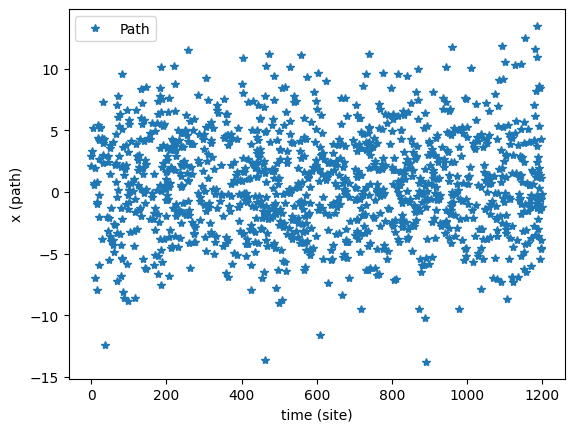

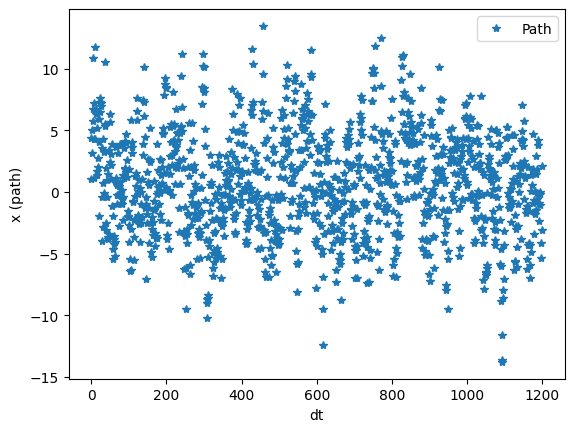

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

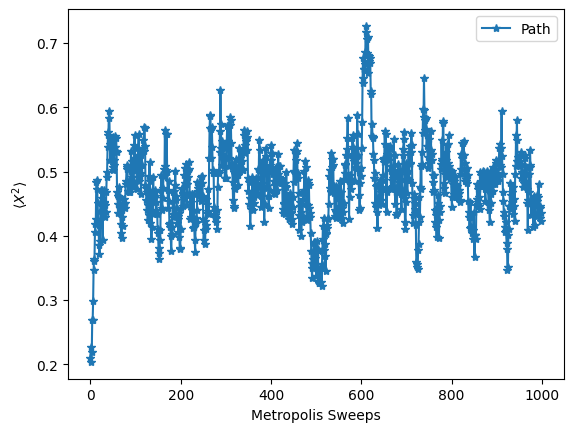

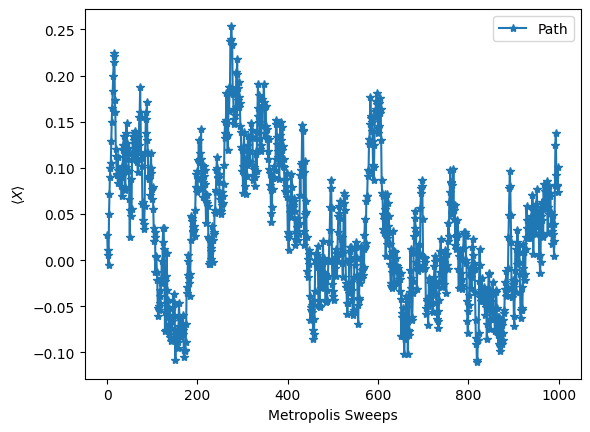

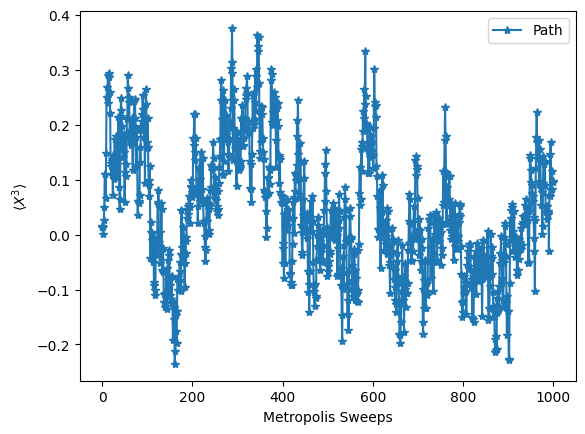

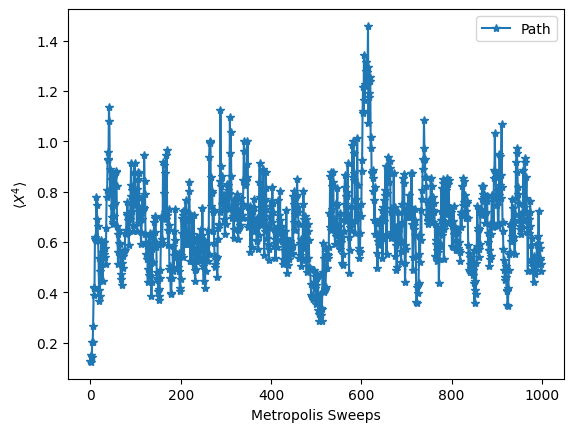

deltatii 1
deltatii 2
deltatii 3
deltatii 4
deltatii 5
deltatii 6
deltatii 7
deltatii 8
deltatii 9
deltatii 10
deltatii 11
deltatii 12
deltatii 13
deltatii 14
deltatii 15
deltatii 16
deltatii 17
deltatii 18
deltatii 19
deltatii 20
deltatii 21
deltatii 22
deltatii 23
deltatii 24
deltatii 25
deltatii 26
deltatii 27
deltatii 28
deltatii 29
deltatii 30
deltatii 31
deltatii 32
deltatii 33
deltatii 34
deltatii 35
deltatii 36
deltatii 37
deltatii 38
deltatii 39
deltatii 40
deltatii 41
deltatii 42
deltatii 43
deltatii 44
deltatii 45
deltatii 46
deltatii 47
deltatii 48
deltatii 49
deltatii 50
deltatii 51
deltatii 52
deltatii 53
deltatii 54
deltatii 55
deltatii 56
deltatii 57
deltatii 58
deltatii 59
deltatii 60
deltatii 61
deltatii 62
deltatii 63
deltatii 64
deltatii 65
deltatii 66
deltatii 67
deltatii 68
deltatii 69
deltatii 70
deltatii 71
deltatii 72
deltatii 73
deltatii 74
deltatii 75
deltatii 76
deltatii 77
deltatii 78
deltatii 79
deltatii 80
deltatii 81
deltatii 82
deltatii 83
deltatii 84
d

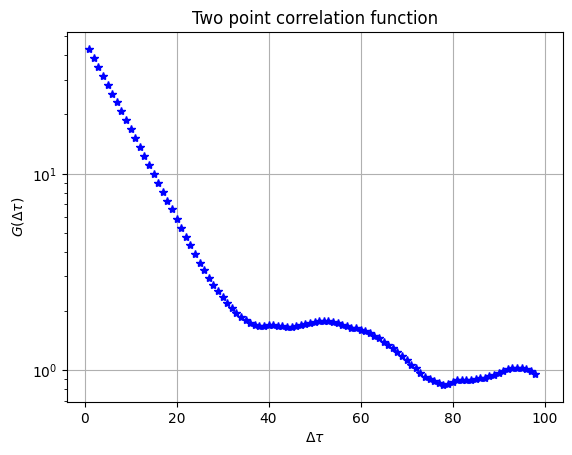

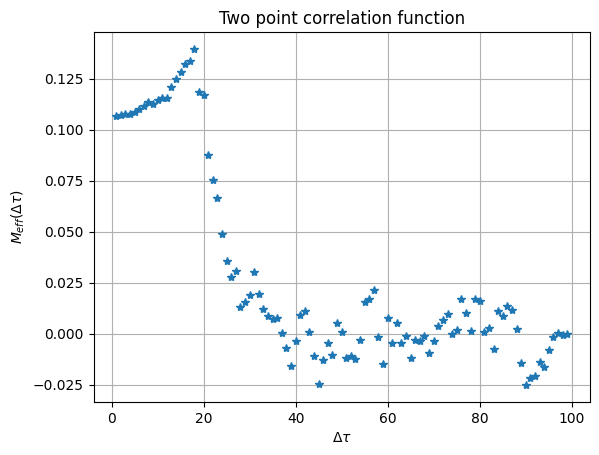

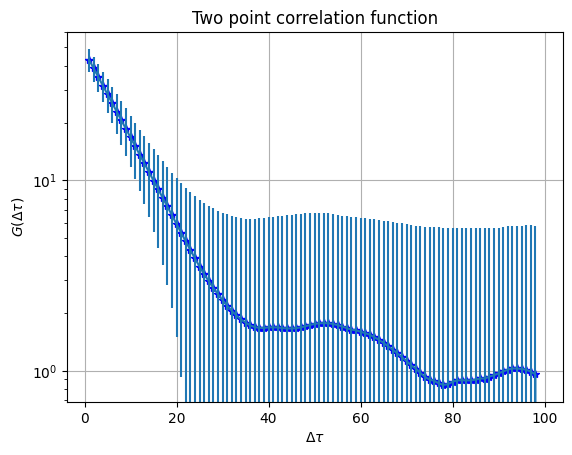

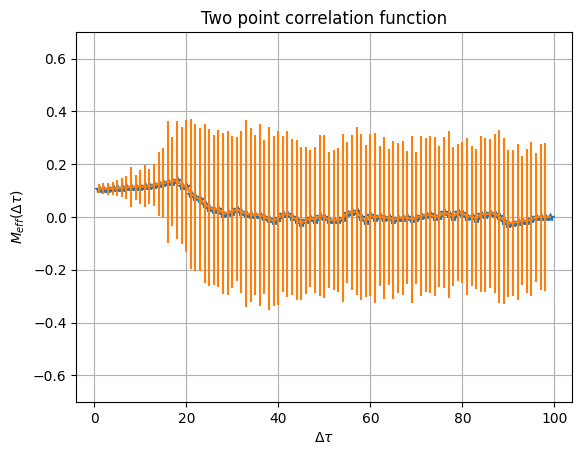

In [ ]:
########## Thermalization ###############
# Trial run

# Actual run, Monte carlo Estimate and expected value of x**2
dtt=0.1
Nt=1200
Nsweeps=1000 #1000 #1000 or 10000
path=np.zeros(Nt) #cold start #initialize path ("seed")
path=np.random.rand(Nt) #hot start
h=0.8 #free parameter

#observables and correlations  statistically measured from many configurations
deltat=np.arange(1,100,1) # independet variable of the correlation measurements
EmcX1=np.zeros(Nsweeps)
EmcX2=np.zeros(Nsweeps)
EmcX3=np.zeros(Nsweeps)
EmcX4=np.zeros(Nsweeps)
G=np.zeros((Nsweeps, len(deltat)))
G2=np.zeros((Nsweeps, len(deltat)))
einv=np.zeros((Nsweeps, len(deltat)))
m=0.1
w=0.1

# for thermalization
for dis in range(0,150,1):
  path,h, x2EV, x4EV,dt, index, EmcX1dis, EmcX2dis, EmcX3dis, EmcX4dis =MetropolisHS(Nt,path,h,m,w)
path,h, x2EV, x4EV,dt, index, EmcX1[0], EmcX2[0], EmcX3[0], EmcX4[0] =MetropolisHS(Nt,path,h,m,w)

path1=path*dtt
#two point correlation function and effective mass
#print("k=0",deltat[0])
#print(deltat)
#G[0]=twopf(path1,deltat)
G2[0]=correlation_function(path, deltat)
einv[0]=EffectiveMass(path,deltat)

#plt.plot(Nt,x2EV)
plt.figure(0)
plt.plot(index,path,"*",label="Path")
plt.ylabel("x (path)")
plt.xlabel("time (site)")
#plt.plot(index,h,label="h")
plt.legend()

dt=np.zeros(Nt)
for i in range(0,Nt,1):
  dt[i]=dt[i]+i

print(dt)
plt.figure(1)
plt.plot(dt,path,"*",label="Path")
plt.ylabel("x (path)")
plt.xlabel("dt")
#plt.plot(index,h,label="h")
plt.legend()
plt.show()

######### Expected values (measurements) ########
cntr=np.zeros(Nsweeps)
for cnt in range(0,len(EmcX2),1):
  cntr[cnt]=cnt
for sweep in range(0,Nsweeps,1): #also one sweep is one montecarlo step per site
  print(sweep)
  for dis in range(0,50-1,1):
    path,h, x2EV, x4EV,dt, index, EmcX1dis, EmcX2dis, EmcX3dis, EmcX4dis =MetropolisHS(Nt,path,h,m,w)
  path,h, x2EV, x4EV,dt, index, EmcX1[sweep], EmcX2[sweep], EmcX3[sweep], EmcX4[sweep] =MetropolisHS(Nt,path,h,m,w)

  #two point correlation function and effective mass
  path1=path*dtt
  #print("k=0",deltat[0])
  #print(deltat)
  #G[sweep]=twopf(path1,deltat)
  G2[sweep]=correlation_function(path, deltat)
  einv[sweep]=EffectiveMass(path,deltat)
  #print("einv",einv)

#remember that
EmcX1=EmcX1*dtt
EmcX2=EmcX2*(dtt**2)
EmcX3=EmcX3*(dtt**3)
EmcX4=EmcX4*(dtt**4)
print(G2)
# graph EV of x**2
plt.figure(10)
#cntr=index??
plt.plot(cntr,EmcX2,"*-",label="Path")
plt.ylabel(r"$\langle X^2 \rangle$")
plt.xlabel("Metropolis Sweeps")
#plt.plot(index,h,label="h")
plt.legend()
print("X**2 average", np.sum(EmcX2)/len(EmcX2))

# graph EV of x
plt.figure(11)
#cntr=index??
plt.plot(cntr,EmcX1,"*-",label="Path")
plt.ylabel(r"$\langle X \rangle$")
plt.xlabel("Metropolis Sweeps")
#plt.plot(index,h,label="h")
plt.legend()
print("X average", np.sum(EmcX1)/len(EmcX1))

# graph EV of x**3
plt.figure(12)
#cntr=index??
plt.plot(cntr,EmcX3,"*-",label="Path")
plt.ylabel(r"$\langle X^3 \rangle$")
plt.xlabel("Metropolis Sweeps")
#plt.plot(index,h,label="h")
plt.legend()
print("X**3 average", np.sum(EmcX3)/len(EmcX3))

# graph EV of x**4
plt.figure(13)
#cntr=index??
plt.plot(cntr,EmcX4,"*-",label="Path")
plt.ylabel(r"$\langle X^4 \rangle$")
plt.xlabel("Metropolis Sweeps")
#plt.plot(index,h,label="h")
plt.legend()
print("X**4 average", np.sum(EmcX4)/len(EmcX4))
plt.show()

# graph two point correlation and effective mass
def AvObs(G): #average observables from different random configurations
  AvG=np.zeros(len(deltat))
  AvGSD=np.zeros(len(deltat))
  for ii in range(0,len(deltat)-1,1):
    avSum=0
    avSumSD=0
    print("deltatii",deltat[ii])
    for jj in range(0,Nsweeps,1):
      avSum=avSum+G[jj][ii]
      #print(G[jj][ii])
    AvG[ii]=avSum/Nsweeps
    for jj in range(0,Nsweeps,1):
      avSumSD=avSumSD+(G[jj][ii]-AvG[ii])**2
      #print(G[jj][ii])
    AvGSD[ii]=np.sqrt(avSumSD/(Nsweeps-1))
  #print(AvG,type(AvG))
  return AvG,AvGSD

#avG=AvObs(G)
avG2, AvG2SD=AvObs(G2)
aveinv, AveinvSD=AvObs(einv)

#plt.figure(2)
#plt.plot(deltat,avG,"b*",label="2pC")
#plt.yscale("log")
#plt.legend()

plt.figure(3)
plt.plot(deltat,avG2,"b*")
#plt.errorbar(deltat,avG2, yerr=AvG2SD,fmt="*")
plt.yscale("log")
plt.title("Two point correlation function")
plt.ylabel(r"$G(\Delta \tau)$")
plt.xlabel(r"$\Delta \tau$")
plt.grid()
#plt.legend()
#print(G)
#print(G2)

plt.figure(4)
plt.plot(deltat,aveinv,"*")
#plt.errorbar(deltat,aveinv,yerr=AveinvSD,fmt="*")
plt.title("Two point correlation function")
plt.ylabel(r"$M_{eff}(\Delta \tau)$")
plt.xlabel(r"$\Delta \tau$")
plt.grid()
#plt.legend()
plt.show()

# with error bars
plt.figure(5)
plt.plot(deltat,avG2,"b*")
plt.errorbar(deltat,avG2, yerr=AvG2SD)
plt.yscale("log")
plt.title("Two point correlation function")
plt.ylabel(r"$G(\Delta \tau)$")
plt.xlabel(r"$\Delta \tau$")
plt.grid()
#plt.legend()
#print(G)
#print(G2)

plt.figure(6)
plt.plot(deltat,aveinv,"*")
plt.errorbar(deltat,aveinv,yerr=AveinvSD)
plt.title("Two point correlation function")
plt.ylabel(r"$M_{eff}(\Delta \tau)$")
plt.xlabel(r"$\Delta \tau$")
plt.ylim(-0.7,0.7)
plt.grid()
#plt.legend()
plt.show()


<ipython-input-67-dca827c6dbfb>:56: RuntimeWarning: invalid value encountered in log
  einv=(1/2)*np.log(correlation_function(path,(deltat-1))/correlation_function(path,(deltat+1)))


[0.000e+00 1.000e+00 2.000e+00 ... 5.997e+03 5.998e+03 5.999e+03]


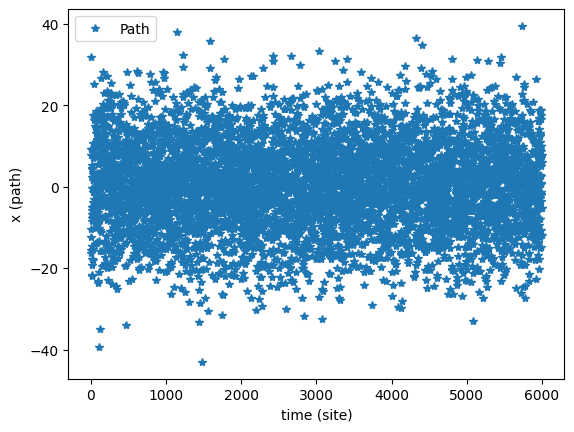

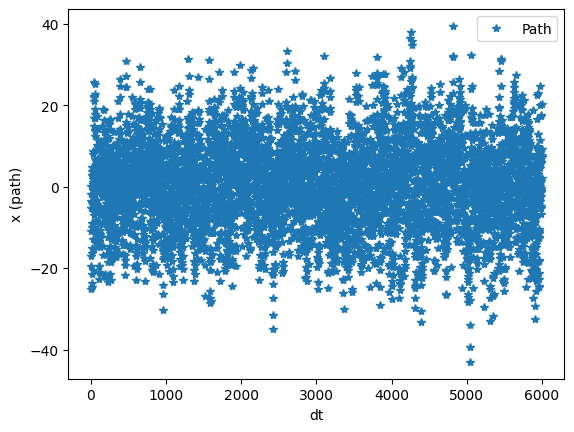

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52


KeyboardInterrupt: 

In [ ]:
########## Thermalization ###############
# Trial run

# Actual run, Monte carlo Estimate and expected value of x**2
dtt=0.02
Nt=6000#1200
Nsweeps=500 #1000 #1000 or 10000
path=np.zeros(Nt) #cold start #initialize path ("seed")
path=np.random.rand(Nt) #hot start
h=0.8 #free parameter

#observables and correlations  statistically measured from many configurations
deltat=np.arange(1,100,1) # independet variable of the correlation measurements
EmcX1=np.zeros(Nsweeps)
EmcX2=np.zeros(Nsweeps)
EmcX3=np.zeros(Nsweeps)
EmcX4=np.zeros(Nsweeps)
G=np.zeros((Nsweeps, len(deltat)))
G2=np.zeros((Nsweeps, len(deltat)))
einv=np.zeros((Nsweeps, len(deltat)))
m=0.02
w=0.02

# for thermalization
for dis in range(0,150,1):
  path,h, x2EV, x4EV,dt, index, EmcX1dis, EmcX2dis, EmcX3dis, EmcX4dis =MetropolisHS(Nt,path,h,m,w)
path,h, x2EV, x4EV,dt, index, EmcX1[0], EmcX2[0], EmcX3[0], EmcX4[0] =MetropolisHS(Nt,path,h,m,w)

path1=path*dtt
#two point correlation function and effective mass
#print("k=0",deltat[0])
#print(deltat)
#G[0]=twopf(path1,deltat)
G2[0]=correlation_function(path, deltat)
einv[0]=EffectiveMass(path,deltat)

#plt.plot(Nt,x2EV)
plt.figure(0)
plt.plot(index,path,"*",label="Path")
plt.ylabel("x (path)")
plt.xlabel("time (site)")
#plt.plot(index,h,label="h")
plt.legend()

dt=np.zeros(Nt)
for i in range(0,Nt,1):
  dt[i]=dt[i]+i

print(dt)
plt.figure(1)
plt.plot(dt,path,"*",label="Path")
plt.ylabel("x (path)")
plt.xlabel("dt")
#plt.plot(index,h,label="h")
plt.legend()
plt.show()

######### Expected values (measurements) ########
cntr=np.zeros(Nsweeps)
for cnt in range(0,len(EmcX2),1):
  cntr[cnt]=cnt
for sweep in range(0,Nsweeps,1): #also one sweep is one montecarlo step per site
  print(sweep)
  for dis in range(0,50-1,1):
    path,h, x2EV, x4EV,dt, index, EmcX1dis, EmcX2dis, EmcX3dis, EmcX4dis =MetropolisHS(Nt,path,h,m,w)
  path,h, x2EV, x4EV,dt, index, EmcX1[sweep], EmcX2[sweep], EmcX3[sweep], EmcX4[sweep] =MetropolisHS(Nt,path,h,m,w)

  #two point correlation function and effective mass
  path1=path*dtt
  #print("k=0",deltat[0])
  #print(deltat)
  #G[sweep]=twopf(path1,deltat)
  G2[sweep]=correlation_function(path, deltat)
  einv[sweep]=EffectiveMass(path,deltat)
  #print("einv",einv)

#remember that
EmcX1=EmcX1*dtt
EmcX2=EmcX2*(dtt**2)
EmcX3=EmcX3*(dtt**3)
EmcX4=EmcX4*(dtt**4)
print(G2)
# graph EV of x**2
plt.figure(10)
#cntr=index??
plt.plot(cntr,EmcX2,"*-",label="Path")
plt.ylabel(r"$\langle X^2 \rangle$")
plt.xlabel("Metropolis Sweeps")
#plt.plot(index,h,label="h")
plt.legend()
print("X**2 average", np.sum(EmcX2)/len(EmcX2))

# graph EV of x
plt.figure(11)
#cntr=index??
plt.plot(cntr,EmcX1,"*-",label="Path")
plt.ylabel(r"$\langle X \rangle$")
plt.xlabel("Metropolis Sweeps")
#plt.plot(index,h,label="h")
plt.legend()
print("X average", np.sum(EmcX1)/len(EmcX1))

# graph EV of x**3
plt.figure(12)
#cntr=index??
plt.plot(cntr,EmcX3,"*-",label="Path")
plt.ylabel(r"$\langle X^3 \rangle$")
plt.xlabel("Metropolis Sweeps")
#plt.plot(index,h,label="h")
plt.legend()
print("X**3 average", np.sum(EmcX3)/len(EmcX3))

# graph EV of x**4
plt.figure(13)
#cntr=index??
plt.plot(cntr,EmcX4,"*-",label="Path")
plt.ylabel(r"$\langle X^4 \rangle$")
plt.xlabel("Metropolis Sweeps")
#plt.plot(index,h,label="h")
plt.legend()
print("X**4 average", np.sum(EmcX4)/len(EmcX4))
plt.show()

# graph two point correlation and effective mass
def AvObs(G): #average observables from different random configurations
  AvG=np.zeros(len(deltat))
  AvGSD=np.zeros(len(deltat))
  for ii in range(0,len(deltat)-1,1):
    avSum=0
    avSumSD=0
    print("deltatii",deltat[ii])
    for jj in range(0,Nsweeps,1):
      avSum=avSum+G[jj][ii]
      #print(G[jj][ii])
    AvG[ii]=avSum/Nsweeps
    for jj in range(0,Nsweeps,1):
      avSumSD=avSumSD+(G[jj][ii]-AvG[ii])**2
      #print(G[jj][ii])
    AvGSD[ii]=np.sqrt(avSumSD/(Nsweeps-1))
  #print(AvG,type(AvG))
  return AvG,AvGSD

#avG=AvObs(G)
avG2, AvG2SD=AvObs(G2)
aveinv, AveinvSD=AvObs(einv)

#plt.figure(2)
#plt.plot(deltat,avG,"b*",label="2pC")
#plt.yscale("log")
#plt.legend()

plt.figure(3)
plt.plot(deltat,avG2,"b*")
#plt.errorbar(deltat,avG2, yerr=AvG2SD,fmt="*")
plt.yscale("log")
plt.title("Two point correlation function")
plt.ylabel(r"$G(\Delta \tau)$")
plt.xlabel(r"$\Delta \tau$")
plt.grid()
#plt.legend()
#print(G)
#print(G2)

plt.figure(4)
plt.plot(deltat,aveinv,"*")
#plt.errorbar(deltat,aveinv,yerr=AveinvSD,fmt="*")
plt.title("Two point correlation function")
plt.ylabel(r"$M_{eff}(\Delta \tau)$")
plt.xlabel(r"$\Delta \tau$")
plt.grid()
#plt.legend()
plt.show()

# with error bars
plt.figure(5)
plt.plot(deltat,avG2,"b*")
plt.errorbar(deltat,avG2, yerr=AvG2SD)
plt.yscale("log")
plt.title("Two point correlation function")
plt.ylabel(r"$G(\Delta \tau)$")
plt.xlabel(r"$\Delta \tau$")
plt.grid()
#plt.legend()
#print(G)
#print(G2)

plt.figure(6)
plt.plot(deltat,aveinv,"*")
plt.errorbar(deltat,aveinv,yerr=AveinvSD)
plt.title("Two point correlation function")
plt.ylabel(r"$M_{eff}(\Delta \tau)$")
plt.xlabel(r"$\Delta \tau$")
plt.ylim(-0.7,0.7)
plt.grid()
#plt.legend()
plt.show()


<ipython-input-67-dca827c6dbfb>:56: RuntimeWarning: invalid value encountered in log
  einv=(1/2)*np.log(correlation_function(path,(deltat-1))/correlation_function(path,(deltat+1)))


[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119.]


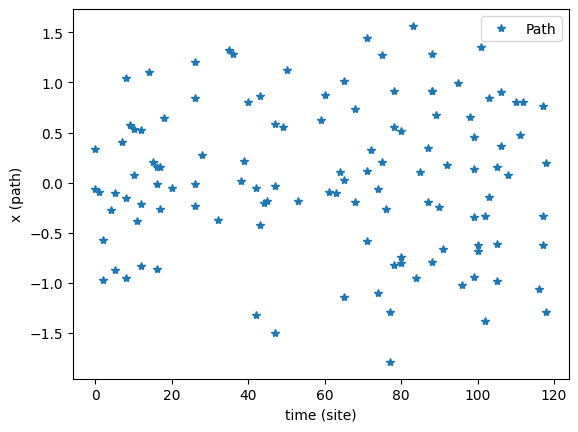

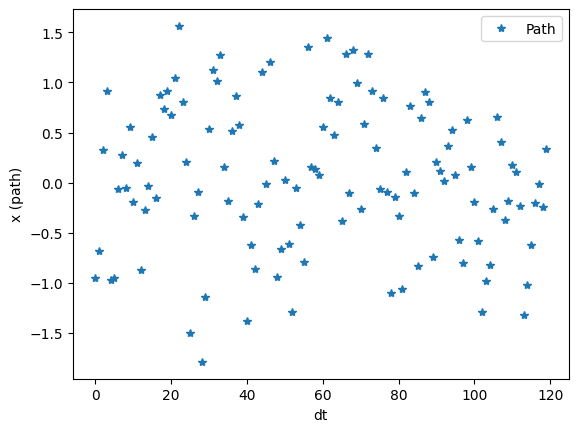

Se han truncado las últimas 5000 líneas del flujo de salida.
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028
5029
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
5040
5041
5042
5043
5044
5045
5046
5047
5048
5049
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204

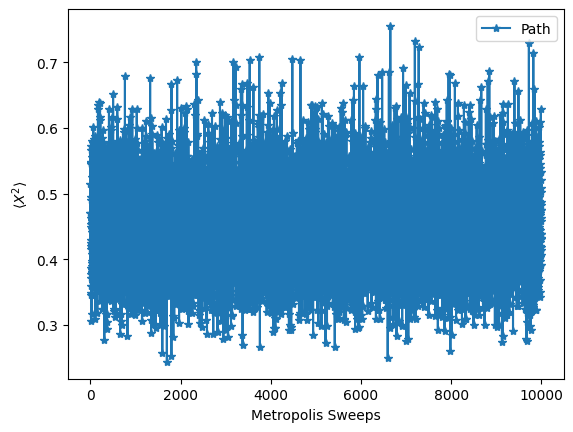

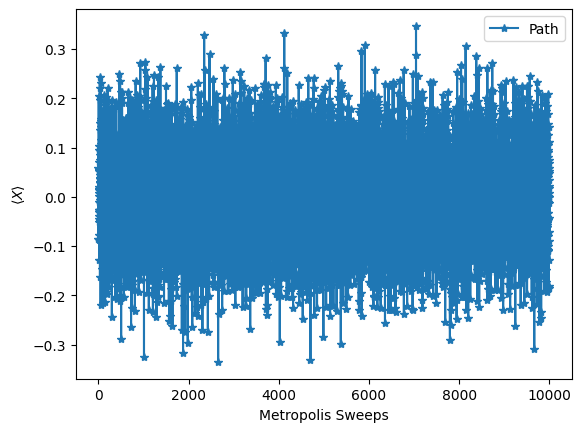

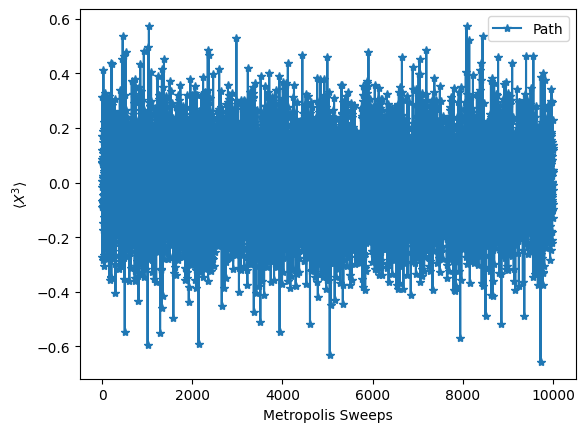

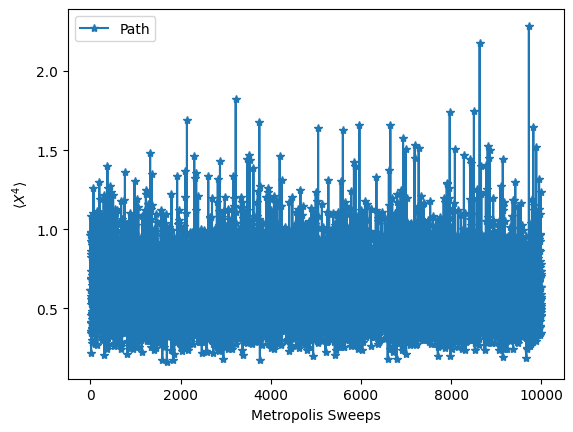

deltatii 1
deltatii 2
deltatii 3
deltatii 4
deltatii 5
deltatii 6
deltatii 7
deltatii 8
deltatii 9
deltatii 10
deltatii 11
deltatii 12
deltatii 13
deltatii 14
deltatii 15
deltatii 16
deltatii 17
deltatii 18
deltatii 19
deltatii 20
deltatii 21
deltatii 22
deltatii 23
deltatii 24
deltatii 25
deltatii 26
deltatii 27
deltatii 28
deltatii 29
deltatii 30
deltatii 31
deltatii 32
deltatii 33
deltatii 34
deltatii 35
deltatii 36
deltatii 37
deltatii 38
deltatii 39
deltatii 40
deltatii 41
deltatii 42
deltatii 43
deltatii 44
deltatii 45
deltatii 46
deltatii 47
deltatii 48
deltatii 49
deltatii 50
deltatii 51
deltatii 52
deltatii 53
deltatii 54
deltatii 55
deltatii 56
deltatii 57
deltatii 58
deltatii 59
deltatii 60
deltatii 61
deltatii 62
deltatii 63
deltatii 64
deltatii 65
deltatii 66
deltatii 67
deltatii 68
deltatii 69
deltatii 70
deltatii 71
deltatii 72
deltatii 73
deltatii 74
deltatii 75
deltatii 76
deltatii 77
deltatii 78
deltatii 79
deltatii 80
deltatii 81
deltatii 82
deltatii 83
deltatii 84
d

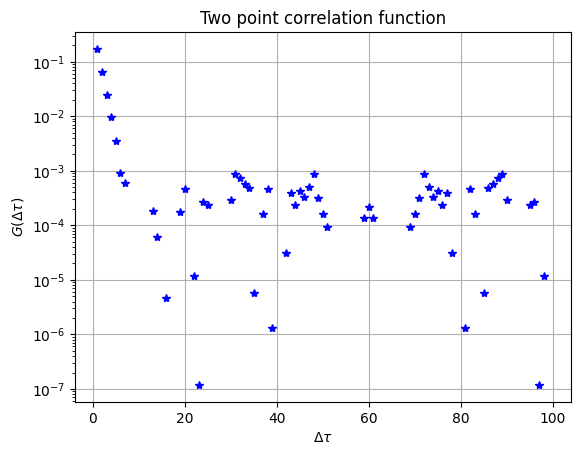

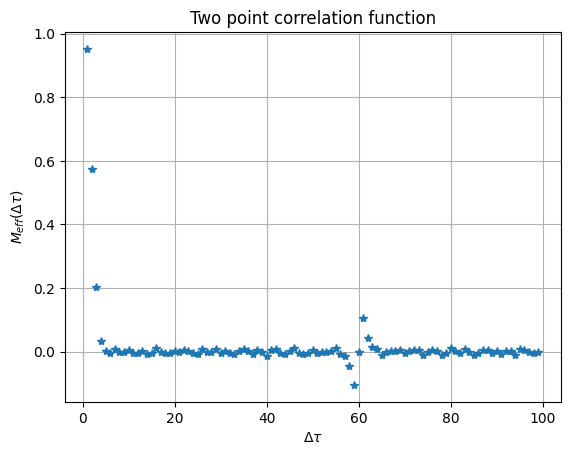

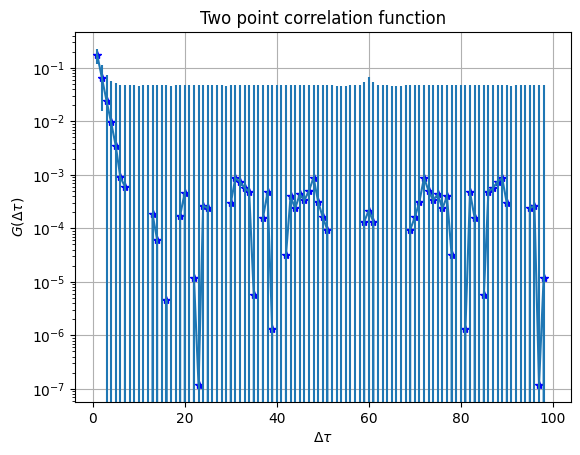

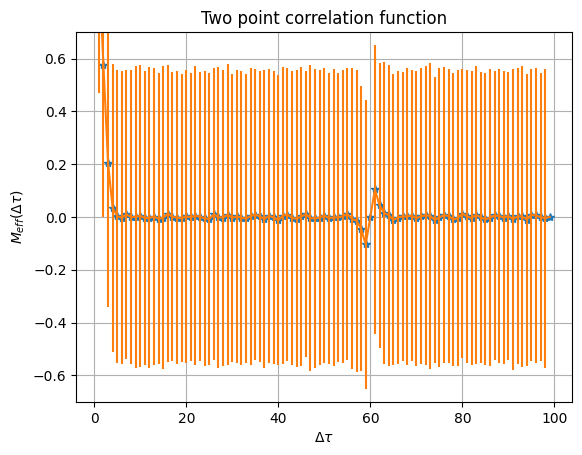

In [ ]:
########## Thermalization ###############
# Trial run

# Actual run, Monte carlo Estimate and expected value of x**2
dtt=1.
Nt=120#1200
Nsweeps=10000 #1000 #1000 or 10000
path=np.zeros(Nt) #cold start #initialize path ("seed")
path=np.random.rand(Nt) #hot start
h=0.8 #free parameter

#observables and correlations  statistically measured from many configurations
deltat=np.arange(1,100,1) # independet variable of the correlation measurements
EmcX1=np.zeros(Nsweeps)
EmcX2=np.zeros(Nsweeps)
EmcX3=np.zeros(Nsweeps)
EmcX4=np.zeros(Nsweeps)
G=np.zeros((Nsweeps, len(deltat)))
G2=np.zeros((Nsweeps, len(deltat)))
einv=np.zeros((Nsweeps, len(deltat)))
m=1.
w=1.

# for thermalization
for dis in range(0,150,1):
  path,h, x2EV, x4EV,dt, index, EmcX1dis, EmcX2dis, EmcX3dis, EmcX4dis =MetropolisHS(Nt,path,h,m,w)
path,h, x2EV, x4EV,dt, index, EmcX1[0], EmcX2[0], EmcX3[0], EmcX4[0] =MetropolisHS(Nt,path,h,m,w)

path1=path*dtt
#two point correlation function and effective mass
#print("k=0",deltat[0])
#print(deltat)
#G[0]=twopf(path1,deltat)
G2[0]=correlation_function(path, deltat)
einv[0]=EffectiveMass(path,deltat)

#plt.plot(Nt,x2EV)
plt.figure(0)
plt.plot(index,path,"*",label="Path")
plt.ylabel("x (path)")
plt.xlabel("time (site)")
#plt.plot(index,h,label="h")
plt.legend()

dt=np.zeros(Nt)
for i in range(0,Nt,1):
  dt[i]=dt[i]+i

print(dt)
plt.figure(1)
plt.plot(dt,path,"*",label="Path")
plt.ylabel("x (path)")
plt.xlabel("dt")
#plt.plot(index,h,label="h")
plt.legend()
plt.show()

######### Expected values (measurements) ########
cntr=np.zeros(Nsweeps)
for cnt in range(0,len(EmcX2),1):
  cntr[cnt]=cnt
for sweep in range(0,Nsweeps,1): #also one sweep is one montecarlo step per site
  print(sweep)
  for dis in range(0,200-1,1):
    path,h, x2EV, x4EV,dt, index, EmcX1dis, EmcX2dis, EmcX3dis, EmcX4dis =MetropolisHS(Nt,path,h,m,w)
  path,h, x2EV, x4EV,dt, index, EmcX1[sweep], EmcX2[sweep], EmcX3[sweep], EmcX4[sweep] =MetropolisHS(Nt,path,h,m,w)

  #two point correlation function and effective mass
  path1=path*dtt
  #print("k=0",deltat[0])
  #print(deltat)
  #G[sweep]=twopf(path1,deltat)
  G2[sweep]=correlation_function(path, deltat)
  einv[sweep]=EffectiveMass(path,deltat)
  #print("einv",einv)

#remember that
EmcX1=EmcX1*dtt
EmcX2=EmcX2*(dtt**2)
EmcX3=EmcX3*(dtt**3)
EmcX4=EmcX4*(dtt**4)
print(G2)
# graph EV of x**2
plt.figure(10)
#cntr=index??
plt.plot(cntr,EmcX2,"*-",label="Path")
plt.ylabel(r"$\langle X^2 \rangle$")
plt.xlabel("Metropolis Sweeps")
#plt.plot(index,h,label="h")
plt.legend()
print("X**2 average", np.sum(EmcX2)/len(EmcX2))

# graph EV of x
plt.figure(11)
#cntr=index??
plt.plot(cntr,EmcX1,"*-",label="Path")
plt.ylabel(r"$\langle X \rangle$")
plt.xlabel("Metropolis Sweeps")
#plt.plot(index,h,label="h")
plt.legend()
print("X average", np.sum(EmcX1)/len(EmcX1))

# graph EV of x**3
plt.figure(12)
#cntr=index??
plt.plot(cntr,EmcX3,"*-",label="Path")
plt.ylabel(r"$\langle X^3 \rangle$")
plt.xlabel("Metropolis Sweeps")
#plt.plot(index,h,label="h")
plt.legend()
print("X**3 average", np.sum(EmcX3)/len(EmcX3))

# graph EV of x**4
plt.figure(13)
#cntr=index??
plt.plot(cntr,EmcX4,"*-",label="Path")
plt.ylabel(r"$\langle X^4 \rangle$")
plt.xlabel("Metropolis Sweeps")
#plt.plot(index,h,label="h")
plt.legend()
print("X**4 average", np.sum(EmcX4)/len(EmcX4))
plt.show()

# graph two point correlation and effective mass
def AvObs(G): #average observables from different random configurations
  AvG=np.zeros(len(deltat))
  AvGSD=np.zeros(len(deltat))
  for ii in range(0,len(deltat)-1,1):
    avSum=0
    avSumSD=0
    print("deltatii",deltat[ii])
    for jj in range(0,Nsweeps,1):
      avSum=avSum+G[jj][ii]
      #print(G[jj][ii])
    AvG[ii]=avSum/Nsweeps
    for jj in range(0,Nsweeps,1):
      avSumSD=avSumSD+(G[jj][ii]-AvG[ii])**2
      #print(G[jj][ii])
    AvGSD[ii]=np.sqrt(avSumSD/(Nsweeps-1))
  #print(AvG,type(AvG))
  return AvG,AvGSD

#avG=AvObs(G)
avG2, AvG2SD=AvObs(G2)
aveinv, AveinvSD=AvObs(einv)

#plt.figure(2)
#plt.plot(deltat,avG,"b*",label="2pC")
#plt.yscale("log")
#plt.legend()

plt.figure(3)
plt.plot(deltat,avG2,"b*")
#plt.errorbar(deltat,avG2, yerr=AvG2SD,fmt="*")
plt.yscale("log")
plt.title("Two point correlation function")
plt.ylabel(r"$G(\Delta \tau)$")
plt.xlabel(r"$\Delta \tau$")
plt.grid()
#plt.legend()
#print(G)
#print(G2)

plt.figure(4)
plt.plot(deltat,aveinv,"*")
#plt.errorbar(deltat,aveinv,yerr=AveinvSD,fmt="*")
plt.title("Two point correlation function")
plt.ylabel(r"$M_{eff}(\Delta \tau)$")
plt.xlabel(r"$\Delta \tau$")
plt.grid()
#plt.legend()
plt.show()

# with error bars
plt.figure(5)
plt.plot(deltat,avG2,"b*")
plt.errorbar(deltat,avG2, yerr=AvG2SD)
plt.yscale("log")
plt.title("Two point correlation function")
plt.ylabel(r"$G(\Delta \tau)$")
plt.xlabel(r"$\Delta \tau$")
plt.grid()
#plt.legend()
#print(G)
#print(G2)

plt.figure(6)
plt.plot(deltat,aveinv,"*")
plt.errorbar(deltat,aveinv,yerr=AveinvSD)
plt.title("Two point correlation function")
plt.ylabel(r"$M_{eff}(\Delta \tau)$")
plt.xlabel(r"$\Delta \tau$")
plt.ylim(-0.7,0.7)
plt.grid()
#plt.legend()
plt.show()

EmcX1_120_1=EmcX1
EmcX2_120_1=EmcX2
EmcX3_120_1=EmcX3
EmcX4_120_1=EmcX4


<ipython-input-67-dca827c6dbfb>:56: RuntimeWarning: invalid value encountered in log
  einv=(1/2)*np.log(correlation_function(path,(deltat-1))/correlation_function(path,(deltat+1)))


[0.000e+00 1.000e+00 2.000e+00 ... 2.397e+03 2.398e+03 2.399e+03]


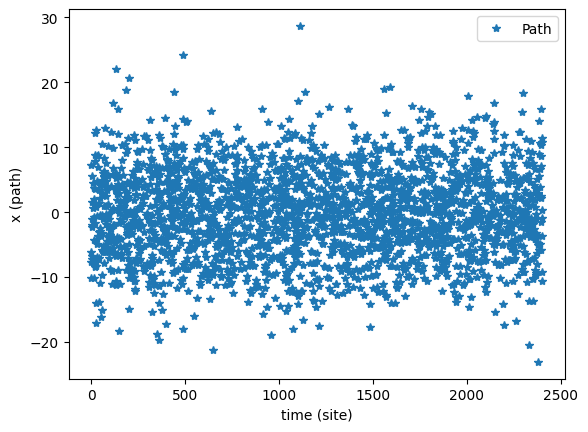

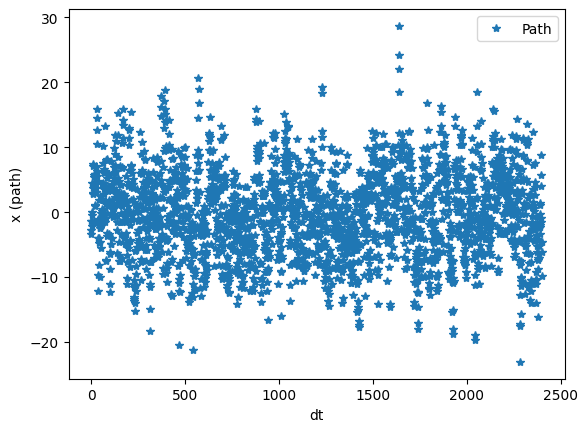

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
[[ 5.61860311e+01  4.74359143e+01  4.04504193e+01 ...  8.45324539e-01
   5.69801917e-01  8.95871098e-01]
 [ 6.96390791e+01  6.09333798e+01  5.26436594e+01 ...  5.71622476e+00
   5.38862159e+00  5.24155453e+00]
 [ 7.72032369e+01  6.86065842e+01  6.07165089e+01 ...  5.07612233e+00
   4.53960539e+00  4.10838102e+00]
 ...
 [ 1.56376295e+02  1.47000433e+02  1.38688429e+02 ... -3.80007530e+00
  -4.03689099e+00 -3.33541109e+00]
 [ 1.64046057e+02  1.54183134e+02  1.44663210e+02 ... -1.67253451e-02
  -6.15199116e-01 -1.57266674e+00]
 [ 1.69697462e+02  1.61119718e+02  1.52992588e+02 ... -3.29992901e+00
  -3.76873345e+00 -3.74796175e+00]]
X**2 average 0.41125632193320305
X average -0.05562510808831017
X**3 avera

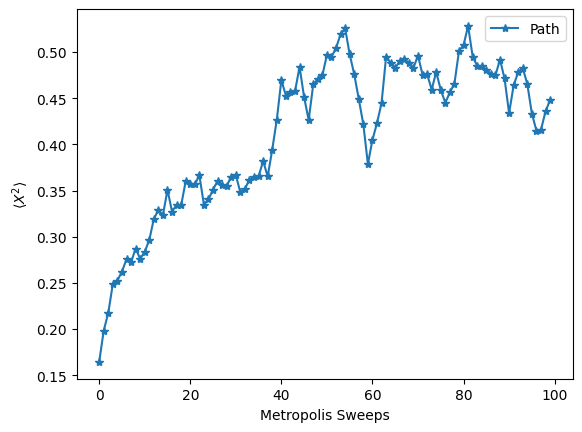

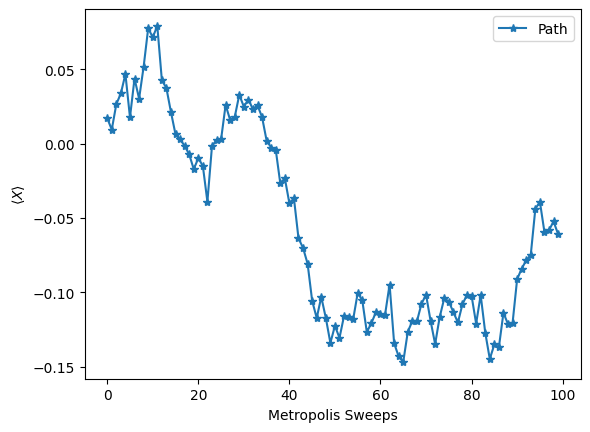

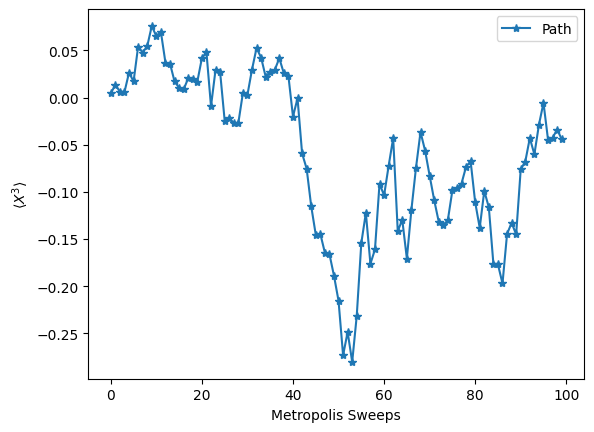

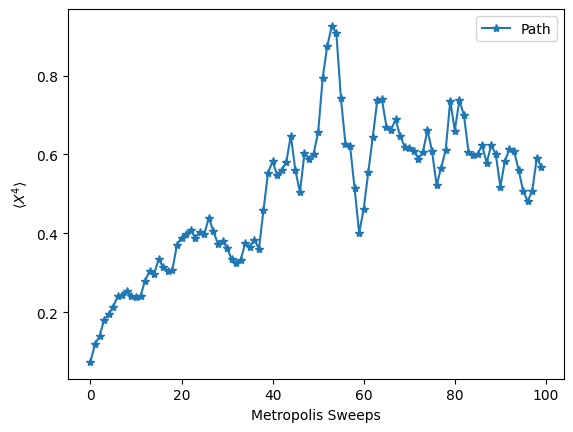

deltatii 1
deltatii 2
deltatii 3
deltatii 4
deltatii 5
deltatii 6
deltatii 7
deltatii 8
deltatii 9
deltatii 10
deltatii 11
deltatii 12
deltatii 13
deltatii 14
deltatii 15
deltatii 16
deltatii 17
deltatii 18
deltatii 19
deltatii 20
deltatii 21
deltatii 22
deltatii 23
deltatii 24
deltatii 25
deltatii 26
deltatii 27
deltatii 28
deltatii 29
deltatii 30
deltatii 31
deltatii 32
deltatii 33
deltatii 34
deltatii 35
deltatii 36
deltatii 37
deltatii 38
deltatii 39
deltatii 40
deltatii 41
deltatii 42
deltatii 43
deltatii 44
deltatii 45
deltatii 46
deltatii 47
deltatii 48
deltatii 49
deltatii 50
deltatii 51
deltatii 52
deltatii 53
deltatii 54
deltatii 55
deltatii 56
deltatii 57
deltatii 58
deltatii 59
deltatii 60
deltatii 61
deltatii 62
deltatii 63
deltatii 64
deltatii 65
deltatii 66
deltatii 67
deltatii 68
deltatii 69
deltatii 70
deltatii 71
deltatii 72
deltatii 73
deltatii 74
deltatii 75
deltatii 76
deltatii 77
deltatii 78
deltatii 79
deltatii 80
deltatii 81
deltatii 82
deltatii 83
deltatii 84
d

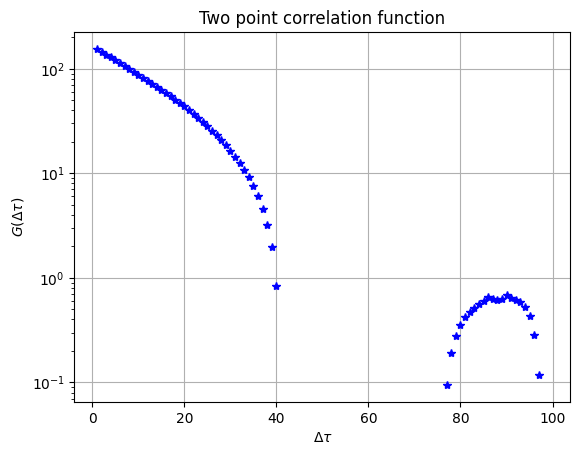

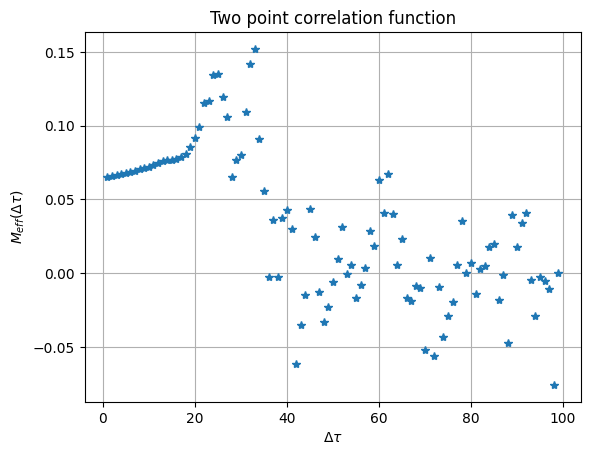

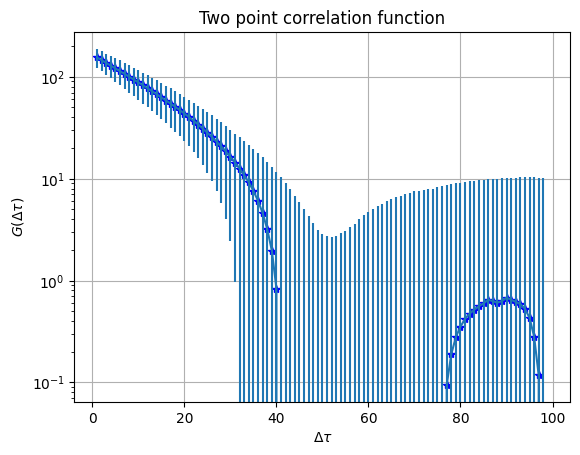

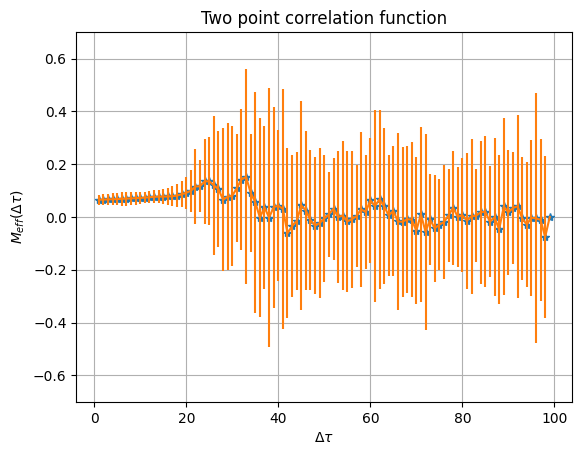

In [ ]:
########## Thermalization ###############
# Trial run

# Actual run, Monte carlo Estimate and expected value of x**2
dtt=0.05
Nt=2400#1200
Nsweeps=100 #1000 #1000 or 10000
path=np.zeros(Nt) #cold start #initialize path ("seed")
path=np.random.rand(Nt) #hot start
h=0.8 #free parameter

#observables and correlations  statistically measured from many configurations
deltat=np.arange(1,100,1) # independet variable of the correlation measurements
EmcX1=np.zeros(Nsweeps)
EmcX2=np.zeros(Nsweeps)
EmcX3=np.zeros(Nsweeps)
EmcX4=np.zeros(Nsweeps)
G=np.zeros((Nsweeps, len(deltat)))
G2=np.zeros((Nsweeps, len(deltat)))
einv=np.zeros((Nsweeps, len(deltat)))
m=0.05
w=0.05

# for thermalization
for dis in range(0,150,1):
  path,h, x2EV, x4EV,dt, index, EmcX1dis, EmcX2dis, EmcX3dis, EmcX4dis =MetropolisHS(Nt,path,h,m,w)
path,h, x2EV, x4EV,dt, index, EmcX1[0], EmcX2[0], EmcX3[0], EmcX4[0] =MetropolisHS(Nt,path,h,m,w)

path1=path*dtt
#two point correlation function and effective mass
#print("k=0",deltat[0])
#print(deltat)
#G[0]=twopf(path1,deltat)
G2[0]=correlation_function(path, deltat)
einv[0]=EffectiveMass(path,deltat)

#plt.plot(Nt,x2EV)
plt.figure(0)
plt.plot(index,path,"*",label="Path")
plt.ylabel("x (path)")
plt.xlabel("time (site)")
#plt.plot(index,h,label="h")
plt.legend()

dt=np.zeros(Nt)
for i in range(0,Nt,1):
  dt[i]=dt[i]+i

print(dt)
plt.figure(1)
plt.plot(dt,path,"*",label="Path")
plt.ylabel("x (path)")
plt.xlabel("dt")
#plt.plot(index,h,label="h")
plt.legend()
plt.show()

######### Expected values (measurements) ########
cntr=np.zeros(Nsweeps)
for cnt in range(0,len(EmcX2),1):
  cntr[cnt]=cnt
for sweep in range(0,Nsweeps,1): #also one sweep is one montecarlo step per site
  print(sweep)
  for dis in range(0,100-1,1):
    path,h, x2EV, x4EV,dt, index, EmcX1dis, EmcX2dis, EmcX3dis, EmcX4dis =MetropolisHS(Nt,path,h,m,w)
  path,h, x2EV, x4EV,dt, index, EmcX1[sweep], EmcX2[sweep], EmcX3[sweep], EmcX4[sweep] =MetropolisHS(Nt,path,h,m,w)

  #two point correlation function and effective mass
  path1=path*dtt
  #print("k=0",deltat[0])
  #print(deltat)
  #G[sweep]=twopf(path1,deltat)
  G2[sweep]=correlation_function(path, deltat)
  einv[sweep]=EffectiveMass(path,deltat)
  #print("einv",einv)

#remember that
EmcX1=EmcX1*dtt
EmcX2=EmcX2*(dtt**2)
EmcX3=EmcX3*(dtt**3)
EmcX4=EmcX4*(dtt**4)
print(G2)
# graph EV of x**2
plt.figure(10)
#cntr=index??
plt.plot(cntr,EmcX2,"*-",label="Path")
plt.ylabel(r"$\langle X^2 \rangle$")
plt.xlabel("Metropolis Sweeps")
#plt.plot(index,h,label="h")
plt.legend()
print("X**2 average", np.sum(EmcX2)/len(EmcX2))

# graph EV of x
plt.figure(11)
#cntr=index??
plt.plot(cntr,EmcX1,"*-",label="Path")
plt.ylabel(r"$\langle X \rangle$")
plt.xlabel("Metropolis Sweeps")
#plt.plot(index,h,label="h")
plt.legend()
print("X average", np.sum(EmcX1)/len(EmcX1))

# graph EV of x**3
plt.figure(12)
#cntr=index??
plt.plot(cntr,EmcX3,"*-",label="Path")
plt.ylabel(r"$\langle X^3 \rangle$")
plt.xlabel("Metropolis Sweeps")
#plt.plot(index,h,label="h")
plt.legend()
print("X**3 average", np.sum(EmcX3)/len(EmcX3))

# graph EV of x**4
plt.figure(13)
#cntr=index??
plt.plot(cntr,EmcX4,"*-",label="Path")
plt.ylabel(r"$\langle X^4 \rangle$")
plt.xlabel("Metropolis Sweeps")
#plt.plot(index,h,label="h")
plt.legend()
print("X**4 average", np.sum(EmcX4)/len(EmcX4))
plt.show()

# graph two point correlation and effective mass
def AvObs(G): #average observables from different random configurations
  AvG=np.zeros(len(deltat))
  AvGSD=np.zeros(len(deltat))
  for ii in range(0,len(deltat)-1,1):
    avSum=0
    avSumSD=0
    print("deltatii",deltat[ii])
    for jj in range(0,Nsweeps,1):
      avSum=avSum+G[jj][ii]
      #print(G[jj][ii])
    AvG[ii]=avSum/Nsweeps
    for jj in range(0,Nsweeps,1):
      avSumSD=avSumSD+(G[jj][ii]-AvG[ii])**2
      #print(G[jj][ii])
    AvGSD[ii]=np.sqrt(avSumSD/(Nsweeps-1))
  #print(AvG,type(AvG))
  return AvG,AvGSD

#avG=AvObs(G)
avG2, AvG2SD=AvObs(G2)
aveinv, AveinvSD=AvObs(einv)

#plt.figure(2)
#plt.plot(deltat,avG,"b*",label="2pC")
#plt.yscale("log")
#plt.legend()

plt.figure(3)
plt.plot(deltat,avG2,"b*")
#plt.errorbar(deltat,avG2, yerr=AvG2SD,fmt="*")
plt.yscale("log")
plt.title("Two point correlation function")
plt.ylabel(r"$G(\Delta \tau)$")
plt.xlabel(r"$\Delta \tau$")
plt.grid()
#plt.legend()
#print(G)
#print(G2)

plt.figure(4)
plt.plot(deltat,aveinv,"*")
#plt.errorbar(deltat,aveinv,yerr=AveinvSD,fmt="*")
plt.title("Two point correlation function")
plt.ylabel(r"$M_{eff}(\Delta \tau)$")
plt.xlabel(r"$\Delta \tau$")
plt.grid()
#plt.legend()
plt.show()

# with error bars
plt.figure(5)
plt.plot(deltat,avG2,"b*")
plt.errorbar(deltat,avG2, yerr=AvG2SD)
plt.yscale("log")
plt.title("Two point correlation function")
plt.ylabel(r"$G(\Delta \tau)$")
plt.xlabel(r"$\Delta \tau$")
plt.grid()
#plt.legend()
#print(G)
#print(G2)

plt.figure(6)
plt.plot(deltat,aveinv,"*")
plt.errorbar(deltat,aveinv,yerr=AveinvSD)
plt.title("Two point correlation function")
plt.ylabel(r"$M_{eff}(\Delta \tau)$")
plt.xlabel(r"$\Delta \tau$")
plt.ylim(-0.7,0.7)
plt.grid()
#plt.legend()
plt.show()

EmcX1_6000_002=EmcX1
EmcX2_6000_002=EmcX2
EmcX3_6000_002=EmcX3
EmcX4_6000_002=EmcX4

<ipython-input-67-dca827c6dbfb>:56: RuntimeWarning: invalid value encountered in log
  einv=(1/2)*np.log(correlation_function(path,(deltat-1))/correlation_function(path,(deltat+1)))


[0.000e+00 1.000e+00 2.000e+00 ... 5.997e+03 5.998e+03 5.999e+03]


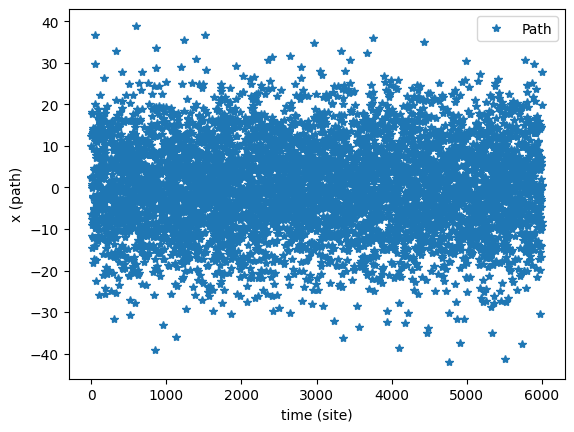

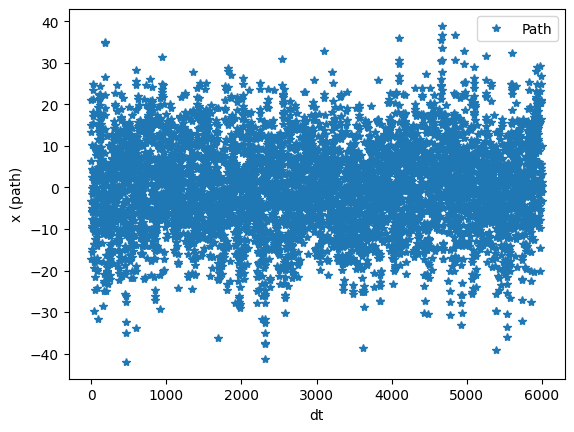

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
[[1.10804827e+02 9.05924266e+01 7.31233085e+01 ... 3.69523012e+00
  3.49949329e+00 3.58272511e+00]
 [1.26613643e+02 1.05955527e+02 8.80769500e+01 ... 1.82657738e+00
  5.53370983e-01 5.31687151e-02]
 [1.44799765e+02 1.24477697e+02 1.05878865e+02 ... 3.77865327e+00
  2.84534871e+00 1.88191105e+00]
 ...
 [5.85028346e+02 5.61400476e+02 5.38809632e+02 ... 2.08597326e+01
  2.09396116e+01 2.21609995e+01]
 [5.93548882e+02 5.69890235e+02 5.47300036e+02 ... 2.66142153e+01
  2.72916759e+01 2.81586571e+01]
 [5.96139027e+02 5.72689084e+02 5.49297550e+02 ... 3.25693357e+01
  3.36101277e+01 3.49455441e+01]]
X**2 average 0.19959575680152056
X average 0.029463352564289655
X**3 average 0.018905926275573547
X**4 average

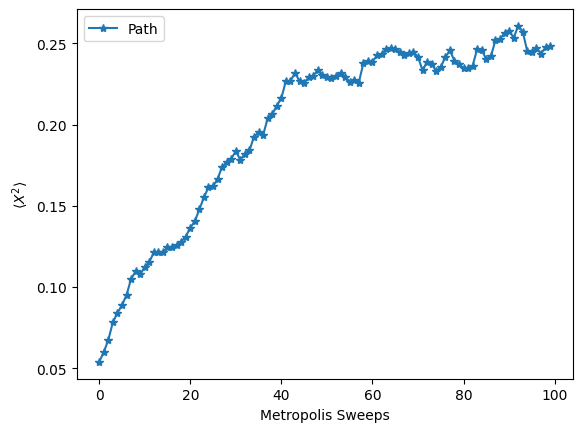

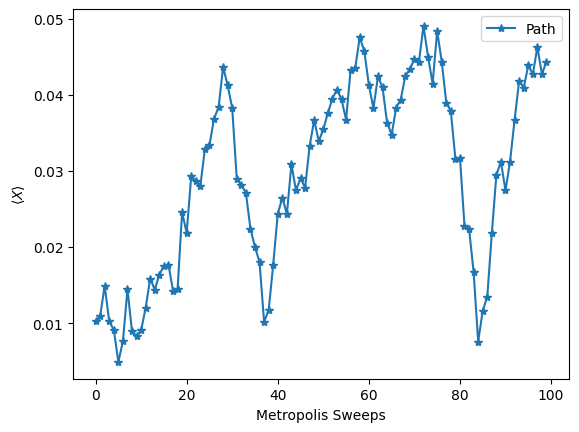

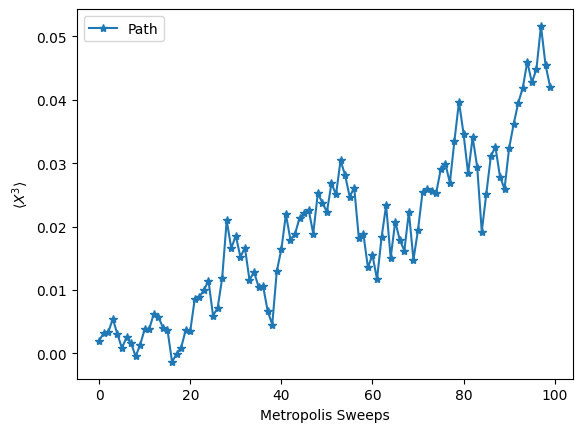

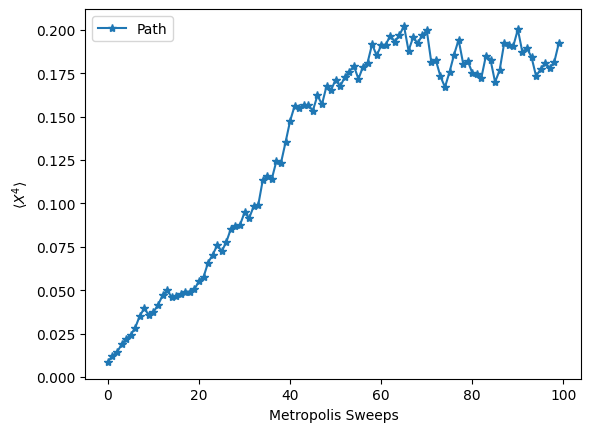

deltatii 1
deltatii 2
deltatii 3
deltatii 4
deltatii 5
deltatii 6
deltatii 7
deltatii 8
deltatii 9
deltatii 10
deltatii 11
deltatii 12
deltatii 13
deltatii 14
deltatii 15
deltatii 16
deltatii 17
deltatii 18
deltatii 19
deltatii 20
deltatii 21
deltatii 22
deltatii 23
deltatii 24
deltatii 25
deltatii 26
deltatii 27
deltatii 28
deltatii 29
deltatii 30
deltatii 31
deltatii 32
deltatii 33
deltatii 34
deltatii 35
deltatii 36
deltatii 37
deltatii 38
deltatii 39
deltatii 40
deltatii 41
deltatii 42
deltatii 43
deltatii 44
deltatii 45
deltatii 46
deltatii 47
deltatii 48
deltatii 49
deltatii 50
deltatii 51
deltatii 52
deltatii 53
deltatii 54
deltatii 55
deltatii 56
deltatii 57
deltatii 58
deltatii 59
deltatii 60
deltatii 61
deltatii 62
deltatii 63
deltatii 64
deltatii 65
deltatii 66
deltatii 67
deltatii 68
deltatii 69
deltatii 70
deltatii 71
deltatii 72
deltatii 73
deltatii 74
deltatii 75
deltatii 76
deltatii 77
deltatii 78
deltatii 79
deltatii 80
deltatii 81
deltatii 82
deltatii 83
deltatii 84
d

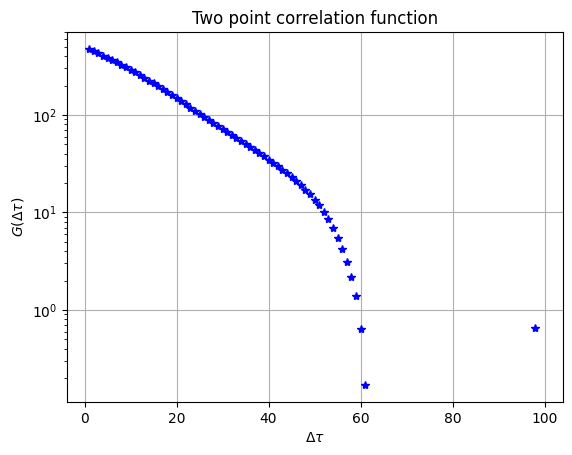

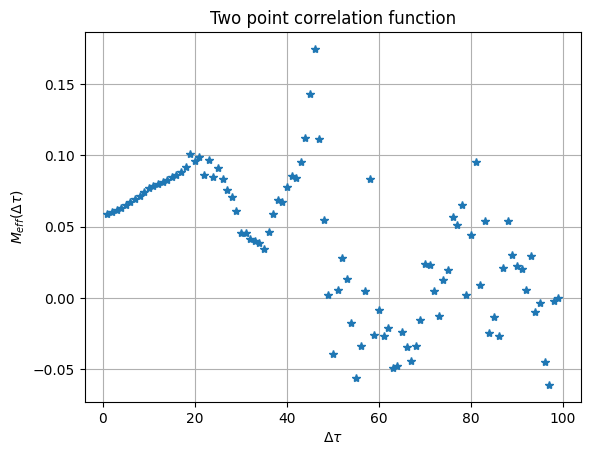

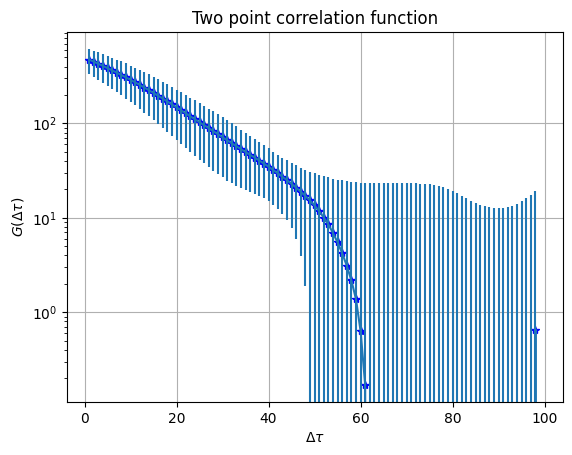

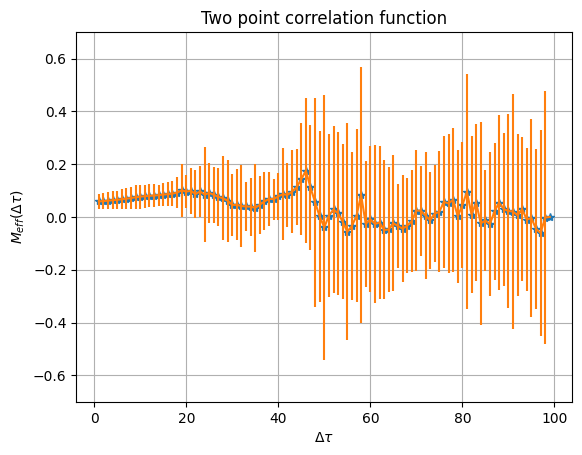

In [ ]:
########## Thermalization ###############
# Trial run

# Actual run, Monte carlo Estimate and expected value of x**2
dtt=0.02
Nt=6000#1200
Nsweeps=100 #1000 #1000 or 10000
path=np.zeros(Nt) #cold start #initialize path ("seed")
path=np.random.rand(Nt) #hot start
h=0.8 #free parameter

#observables and correlations  statistically measured from many configurations
deltat=np.arange(1,100,1) # independet variable of the correlation measurements
EmcX1=np.zeros(Nsweeps)
EmcX2=np.zeros(Nsweeps)
EmcX3=np.zeros(Nsweeps)
EmcX4=np.zeros(Nsweeps)
G=np.zeros((Nsweeps, len(deltat)))
G2=np.zeros((Nsweeps, len(deltat)))
einv=np.zeros((Nsweeps, len(deltat)))
m=0.02
w=0.02

# for thermalization
for dis in range(0,150,1):
  path,h, x2EV, x4EV,dt, index, EmcX1dis, EmcX2dis, EmcX3dis, EmcX4dis =MetropolisHS(Nt,path,h,m,w)
path,h, x2EV, x4EV,dt, index, EmcX1[0], EmcX2[0], EmcX3[0], EmcX4[0] =MetropolisHS(Nt,path,h,m,w)

path1=path*dtt
#two point correlation function and effective mass
#print("k=0",deltat[0])
#print(deltat)
#G[0]=twopf(path1,deltat)
G2[0]=correlation_function(path, deltat)
einv[0]=EffectiveMass(path,deltat)

#plt.plot(Nt,x2EV)
plt.figure(0)
plt.plot(index,path,"*",label="Path")
plt.ylabel("x (path)")
plt.xlabel("time (site)")
#plt.plot(index,h,label="h")
plt.legend()

dt=np.zeros(Nt)
for i in range(0,Nt,1):
  dt[i]=dt[i]+i

print(dt)
plt.figure(1)
plt.plot(dt,path,"*",label="Path")
plt.ylabel("x (path)")
plt.xlabel("dt")
#plt.plot(index,h,label="h")
plt.legend()
plt.show()

######### Expected values (measurements) ########
cntr=np.zeros(Nsweeps)
for cnt in range(0,len(EmcX2),1):
  cntr[cnt]=cnt
for sweep in range(0,Nsweeps,1): #also one sweep is one montecarlo step per site
  print(sweep)
  for dis in range(0,50-1,1):
    path,h, x2EV, x4EV,dt, index, EmcX1dis, EmcX2dis, EmcX3dis, EmcX4dis =MetropolisHS(Nt,path,h,m,w)
  path,h, x2EV, x4EV,dt, index, EmcX1[sweep], EmcX2[sweep], EmcX3[sweep], EmcX4[sweep] =MetropolisHS(Nt,path,h,m,w)

  #two point correlation function and effective mass
  path1=path*dtt
  #print("k=0",deltat[0])
  #print(deltat)
  #G[sweep]=twopf(path1,deltat)
  G2[sweep]=correlation_function(path, deltat)
  einv[sweep]=EffectiveMass(path,deltat)
  #print("einv",einv)

#remember that
EmcX1=EmcX1*dtt
EmcX2=EmcX2*(dtt**2)
EmcX3=EmcX3*(dtt**3)
EmcX4=EmcX4*(dtt**4)
print(G2)
# graph EV of x**2
plt.figure(10)
#cntr=index??
plt.plot(cntr,EmcX2,"*-",label="Path")
plt.ylabel(r"$\langle X^2 \rangle$")
plt.xlabel("Metropolis Sweeps")
#plt.plot(index,h,label="h")
plt.legend()
print("X**2 average", np.sum(EmcX2)/len(EmcX2))

# graph EV of x
plt.figure(11)
#cntr=index??
plt.plot(cntr,EmcX1,"*-",label="Path")
plt.ylabel(r"$\langle X \rangle$")
plt.xlabel("Metropolis Sweeps")
#plt.plot(index,h,label="h")
plt.legend()
print("X average", np.sum(EmcX1)/len(EmcX1))

# graph EV of x**3
plt.figure(12)
#cntr=index??
plt.plot(cntr,EmcX3,"*-",label="Path")
plt.ylabel(r"$\langle X^3 \rangle$")
plt.xlabel("Metropolis Sweeps")
#plt.plot(index,h,label="h")
plt.legend()
print("X**3 average", np.sum(EmcX3)/len(EmcX3))

# graph EV of x**4
plt.figure(13)
#cntr=index??
plt.plot(cntr,EmcX4,"*-",label="Path")
plt.ylabel(r"$\langle X^4 \rangle$")
plt.xlabel("Metropolis Sweeps")
#plt.plot(index,h,label="h")
plt.legend()
print("X**4 average", np.sum(EmcX4)/len(EmcX4))
plt.show()

# graph two point correlation and effective mass
def AvObs(G): #average observables from different random configurations
  AvG=np.zeros(len(deltat))
  AvGSD=np.zeros(len(deltat))
  for ii in range(0,len(deltat)-1,1):
    avSum=0
    avSumSD=0
    print("deltatii",deltat[ii])
    for jj in range(0,Nsweeps,1):
      avSum=avSum+G[jj][ii]
      #print(G[jj][ii])
    AvG[ii]=avSum/Nsweeps
    for jj in range(0,Nsweeps,1):
      avSumSD=avSumSD+(G[jj][ii]-AvG[ii])**2
      #print(G[jj][ii])
    AvGSD[ii]=np.sqrt(avSumSD/(Nsweeps-1))
  #print(AvG,type(AvG))
  return AvG,AvGSD

#avG=AvObs(G)
avG2, AvG2SD=AvObs(G2)
aveinv, AveinvSD=AvObs(einv)

#plt.figure(2)
#plt.plot(deltat,avG,"b*",label="2pC")
#plt.yscale("log")
#plt.legend()

plt.figure(3)
plt.plot(deltat,avG2,"b*")
#plt.errorbar(deltat,avG2, yerr=AvG2SD,fmt="*")
plt.yscale("log")
plt.title("Two point correlation function")
plt.ylabel(r"$G(\Delta \tau)$")
plt.xlabel(r"$\Delta \tau$")
plt.grid()
#plt.legend()
#print(G)
#print(G2)

plt.figure(4)
plt.plot(deltat,aveinv,"*")
#plt.errorbar(deltat,aveinv,yerr=AveinvSD,fmt="*")
plt.title("Two point correlation function")
plt.ylabel(r"$M_{eff}(\Delta \tau)$")
plt.xlabel(r"$\Delta \tau$")
plt.grid()
#plt.legend()
plt.show()

# with error bars
plt.figure(5)
plt.plot(deltat,avG2,"b*")
plt.errorbar(deltat,avG2, yerr=AvG2SD)
plt.yscale("log")
plt.title("Two point correlation function")
plt.ylabel(r"$G(\Delta \tau)$")
plt.xlabel(r"$\Delta \tau$")
plt.grid()
#plt.legend()
#print(G)
#print(G2)

plt.figure(6)
plt.plot(deltat,aveinv,"*")
plt.errorbar(deltat,aveinv,yerr=AveinvSD)
plt.title("Two point correlation function")
plt.ylabel(r"$M_{eff}(\Delta \tau)$")
plt.xlabel(r"$\Delta \tau$")
plt.ylim(-0.7,0.7)
plt.grid()
#plt.legend()
plt.show()

EmcX1_6000_002=EmcX1
EmcX2_6000_002=EmcX2
EmcX3_6000_002=EmcX3
EmcX4_6000_002=EmcX4

<ipython-input-67-dca827c6dbfb>:56: RuntimeWarning: invalid value encountered in log
  einv=(1/2)*np.log(correlation_function(path,(deltat-1))/correlation_function(path,(deltat+1)))


[0.000e+00 1.000e+00 2.000e+00 ... 1.197e+03 1.198e+03 1.199e+03]


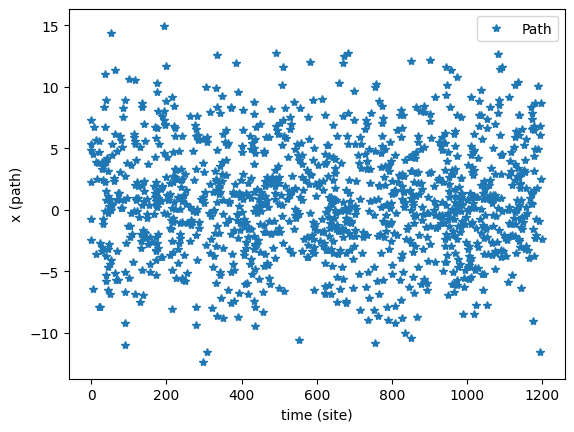

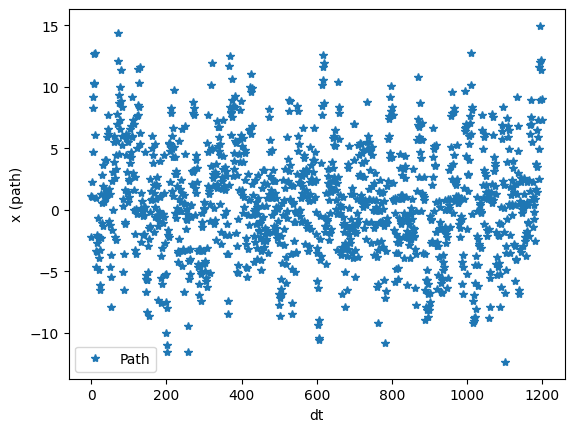

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

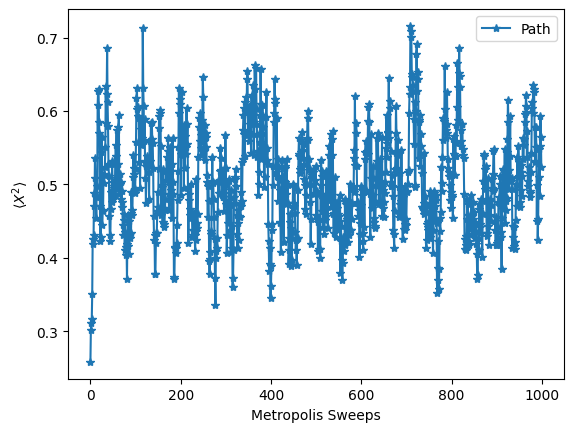

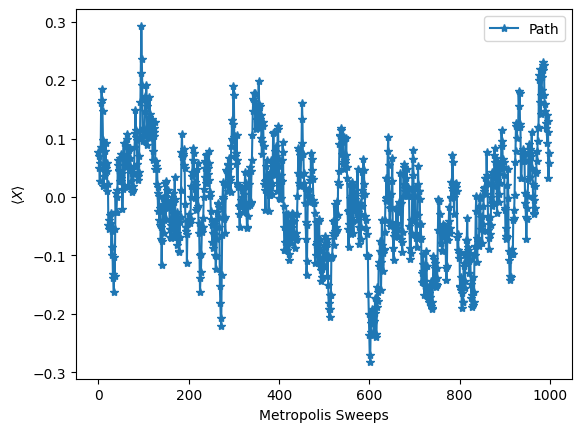

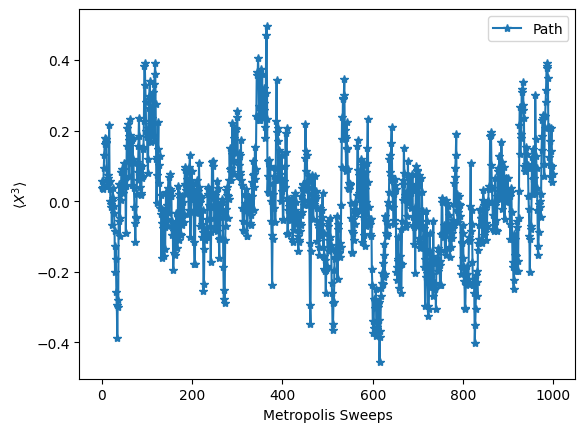

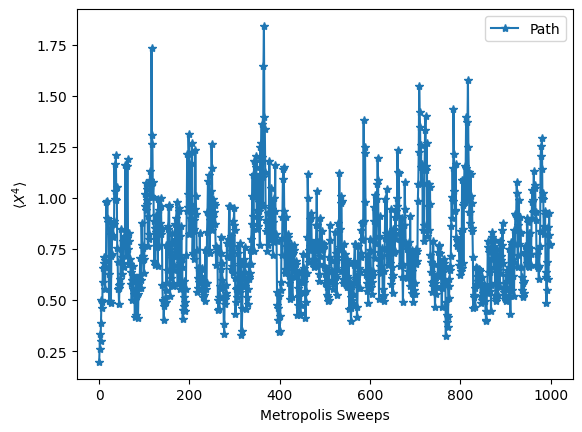

deltatii 1
deltatii 2
deltatii 3
deltatii 4
deltatii 5
deltatii 6
deltatii 7
deltatii 8
deltatii 9
deltatii 10
deltatii 11
deltatii 12
deltatii 13
deltatii 14
deltatii 15
deltatii 16
deltatii 17
deltatii 18
deltatii 19
deltatii 20
deltatii 21
deltatii 22
deltatii 23
deltatii 24
deltatii 25
deltatii 26
deltatii 27
deltatii 28
deltatii 29
deltatii 30
deltatii 31
deltatii 32
deltatii 33
deltatii 34
deltatii 35
deltatii 36
deltatii 37
deltatii 38
deltatii 39
deltatii 40
deltatii 41
deltatii 42
deltatii 43
deltatii 44
deltatii 45
deltatii 46
deltatii 47
deltatii 48
deltatii 49
deltatii 50
deltatii 51
deltatii 52
deltatii 53
deltatii 54
deltatii 55
deltatii 56
deltatii 57
deltatii 58
deltatii 59
deltatii 60
deltatii 61
deltatii 62
deltatii 63
deltatii 64
deltatii 65
deltatii 66
deltatii 67
deltatii 68
deltatii 69
deltatii 70
deltatii 71
deltatii 72
deltatii 73
deltatii 74
deltatii 75
deltatii 76
deltatii 77
deltatii 78
deltatii 79
deltatii 80
deltatii 81
deltatii 82
deltatii 83
deltatii 84
d

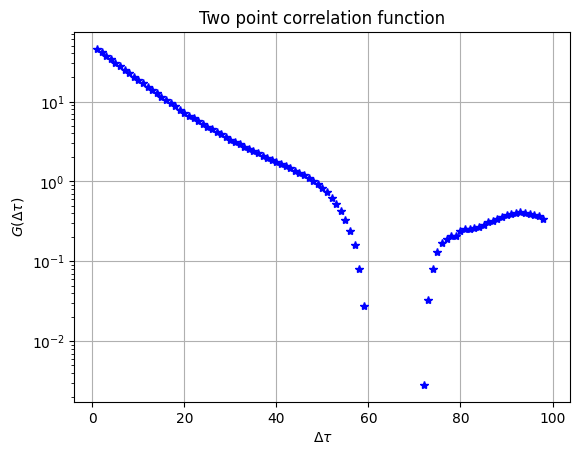

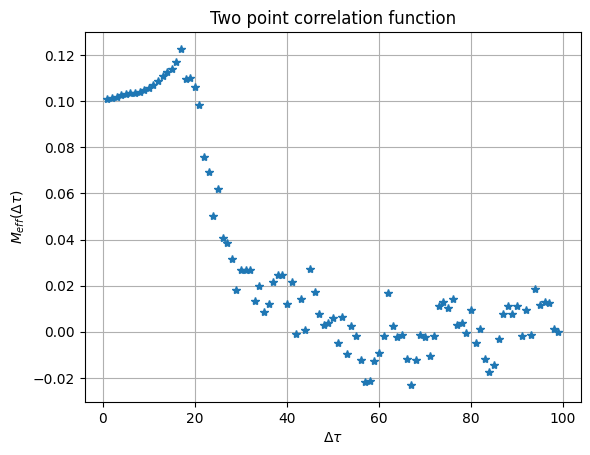

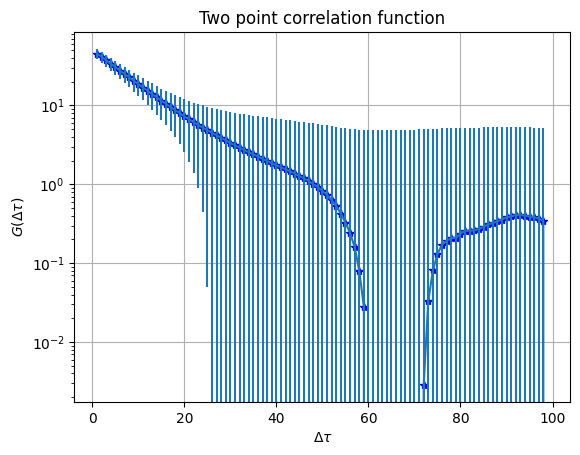

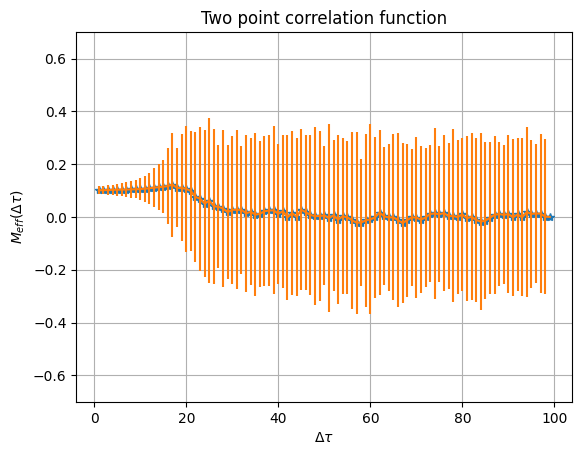

In [ ]:
########## Thermalization ###############
# Trial run

# Actual run, Monte carlo Estimate and expected value of x**2
dtt=0.1
Nt=1200
Nsweeps=1000 #1000 #1000 or 10000
path=np.zeros(Nt) #cold start #initialize path ("seed")
path=np.random.rand(Nt) #hot start
h=0.8 #free parameter

#observables and correlations  statistically measured from many configurations
deltat=np.arange(1,100,1) # independet variable of the correlation measurements
EmcX1=np.zeros(Nsweeps)
EmcX2=np.zeros(Nsweeps)
EmcX3=np.zeros(Nsweeps)
EmcX4=np.zeros(Nsweeps)
G=np.zeros((Nsweeps, len(deltat)))
G2=np.zeros((Nsweeps, len(deltat)))
einv=np.zeros((Nsweeps, len(deltat)))
m=0.1
w=0.1

# for thermalization
for dis in range(0,150,1):
  path,h, x2EV, x4EV,dt, index, EmcX1dis, EmcX2dis, EmcX3dis, EmcX4dis =MetropolisHS(Nt,path,h,m,w)
path,h, x2EV, x4EV,dt, index, EmcX1[0], EmcX2[0], EmcX3[0], EmcX4[0] =MetropolisHS(Nt,path,h,m,w)

path1=path*dtt
#two point correlation function and effective mass
#print("k=0",deltat[0])
#print(deltat)
#G[0]=twopf(path1,deltat)
G2[0]=correlation_function(path, deltat)
einv[0]=EffectiveMass(path,deltat)

#plt.plot(Nt,x2EV)
plt.figure(0)
plt.plot(index,path,"*",label="Path")
plt.ylabel("x (path)")
plt.xlabel("time (site)")
#plt.plot(index,h,label="h")
plt.legend()

dt=np.zeros(Nt)
for i in range(0,Nt,1):
  dt[i]=dt[i]+i

print(dt)
plt.figure(1)
plt.plot(dt,path,"*",label="Path")
plt.ylabel("x (path)")
plt.xlabel("dt")
#plt.plot(index,h,label="h")
plt.legend()
plt.show()

######### Expected values (measurements) ########
cntr=np.zeros(Nsweeps)
for cnt in range(0,len(EmcX2),1):
  cntr[cnt]=cnt
for sweep in range(0,Nsweeps,1): #also one sweep is one montecarlo step per site
  print(sweep)
  for dis in range(0,120-1,1):
    path,h, x2EV, x4EV,dt, index, EmcX1dis, EmcX2dis, EmcX3dis, EmcX4dis =MetropolisHS(Nt,path,h,m,w)
  path,h, x2EV, x4EV,dt, index, EmcX1[sweep], EmcX2[sweep], EmcX3[sweep], EmcX4[sweep] =MetropolisHS(Nt,path,h,m,w)

  #two point correlation function and effective mass
  path1=path*dtt
  #print("k=0",deltat[0])
  #print(deltat)
  #G[sweep]=twopf(path1,deltat)
  G2[sweep]=correlation_function(path, deltat)
  einv[sweep]=EffectiveMass(path,deltat)
  #print("einv",einv)

#remember that
EmcX1=EmcX1*dtt
EmcX2=EmcX2*(dtt**2)
EmcX3=EmcX3*(dtt**3)
EmcX4=EmcX4*(dtt**4)
print(G2)
# graph EV of x**2
plt.figure(10)
#cntr=index??
plt.plot(cntr,EmcX2,"*-",label="Path")
plt.ylabel(r"$\langle X^2 \rangle$")
plt.xlabel("Metropolis Sweeps")
#plt.plot(index,h,label="h")
plt.legend()
print("X**2 average", np.sum(EmcX2)/len(EmcX2))

# graph EV of x
plt.figure(11)
#cntr=index??
plt.plot(cntr,EmcX1,"*-",label="Path")
plt.ylabel(r"$\langle X \rangle$")
plt.xlabel("Metropolis Sweeps")
#plt.plot(index,h,label="h")
plt.legend()
print("X average", np.sum(EmcX1)/len(EmcX1))

# graph EV of x**3
plt.figure(12)
#cntr=index??
plt.plot(cntr,EmcX3,"*-",label="Path")
plt.ylabel(r"$\langle X^3 \rangle$")
plt.xlabel("Metropolis Sweeps")
#plt.plot(index,h,label="h")
plt.legend()
print("X**3 average", np.sum(EmcX3)/len(EmcX3))

# graph EV of x**4
plt.figure(13)
#cntr=index??
plt.plot(cntr,EmcX4,"*-",label="Path")
plt.ylabel(r"$\langle X^4 \rangle$")
plt.xlabel("Metropolis Sweeps")
#plt.plot(index,h,label="h")
plt.legend()
print("X**4 average", np.sum(EmcX4)/len(EmcX4))
plt.show()

# graph two point correlation and effective mass
def AvObs(G): #average observables from different random configurations
  AvG=np.zeros(len(deltat))
  AvGSD=np.zeros(len(deltat))
  for ii in range(0,len(deltat)-1,1):
    avSum=0
    avSumSD=0
    print("deltatii",deltat[ii])
    for jj in range(0,Nsweeps,1):
      avSum=avSum+G[jj][ii]
      #print(G[jj][ii])
    AvG[ii]=avSum/Nsweeps
    for jj in range(0,Nsweeps,1):
      avSumSD=avSumSD+(G[jj][ii]-AvG[ii])**2
      #print(G[jj][ii])
    AvGSD[ii]=np.sqrt(avSumSD/(Nsweeps-1))
  #print(AvG,type(AvG))
  return AvG,AvGSD

#avG=AvObs(G)
avG2, AvG2SD=AvObs(G2)
aveinv, AveinvSD=AvObs(einv)

#plt.figure(2)
#plt.plot(deltat,avG,"b*",label="2pC")
#plt.yscale("log")
#plt.legend()

plt.figure(3)
plt.plot(deltat,avG2,"b*")
#plt.errorbar(deltat,avG2, yerr=AvG2SD,fmt="*")
plt.yscale("log")
plt.title("Two point correlation function")
plt.ylabel(r"$G(\Delta \tau)$")
plt.xlabel(r"$\Delta \tau$")
plt.grid()
#plt.legend()
#print(G)
#print(G2)

plt.figure(4)
plt.plot(deltat,aveinv,"*")
#plt.errorbar(deltat,aveinv,yerr=AveinvSD,fmt="*")
plt.title("Two point correlation function")
plt.ylabel(r"$M_{eff}(\Delta \tau)$")
plt.xlabel(r"$\Delta \tau$")
plt.grid()
#plt.legend()
plt.show()

# with error bars
plt.figure(5)
plt.plot(deltat,avG2,"b*")
plt.errorbar(deltat,avG2, yerr=AvG2SD)
plt.yscale("log")
plt.title("Two point correlation function")
plt.ylabel(r"$G(\Delta \tau)$")
plt.xlabel(r"$\Delta \tau$")
plt.grid()
#plt.legend()
#print(G)
#print(G2)

plt.figure(6)
plt.plot(deltat,aveinv,"*")
plt.errorbar(deltat,aveinv,yerr=AveinvSD)
plt.title("Two point correlation function")
plt.ylabel(r"$M_{eff}(\Delta \tau)$")
plt.xlabel(r"$\Delta \tau$")
plt.ylim(-0.7,0.7)
plt.grid()
#plt.legend()
plt.show()

EmcX1_1200_01=EmcX1
EmcX2_1200_01=EmcX2
EmcX3_1200_01=EmcX3
EmcX4_1200_01=EmcX4

In [ ]:
x2EV, x4EV=ExpectValX24(12000,0.01,0.01)
print(x4EV)

74998125.04687381


##Theoretical comparison with calculated $⟨x^{4}⟩$

In [4]:
#elt=np.arange(0.01,1,0.001) #Effective lattice spacing
#Ntcons=np.arange(12000,120)
elt=np.linspace(0.01,10,1000) #Effective lattice spacing
Ntcons=np.linspace(12000,12,1000)
#print(Ntcons)
x2EV=np.zeros(len(elt))
x4EV=np.zeros(len(elt))

for i in range(0,len(elt),1):
  x2EV[i], x4EV[i]=ExpectValX24(Ntcons[i],elt[i],elt[i])
  #print(Ntcons[i],elt[i])


eltdis=[0.05,0.1,1]
x4EVdis=[0.49,0.75,0.6]

ax[2,0].plot(elt,x4EV,label="theoretical")
ax[2,0].plot(eltdis,x4EVdis,"o",label="Sim Average")
ax[2,0].set_xscale("log")
ax[2,0].set_xlabel("Effective lattice spacing")
ax[2,0].set_ylabel(r"$⟨X^{4}⟩$")
ax[2,0].set_ylim(0.55,0.8)
ax[2,0].set_xlim(10**-2,3)
ax[2,0].grid()
ax[2,0].legend()
fig.show()


eltdis=[0.05,0.1,1]
x2EVdis=[0.41,0.5,0.45]

ax[2,1].plot(elt,x2EV,label="theoretical")
ax[2,1].plot(eltdis,x2EVdis,"o",label="Sim Average")
ax[2,1].set_xscale("log")
ax[2,1].set_xlabel("Effective lattice spacing")
ax[2,1].set_ylabel(r"$⟨X^{2}⟩$")
#plt.ylim(0.55,0.8)
#plt.xlim(10**-2,3)
ax[2,1].grid()
ax[2,1].legend()
fig.show()
fig.savefig("1stgraph.eps")
fig.savefig("1stgraph")



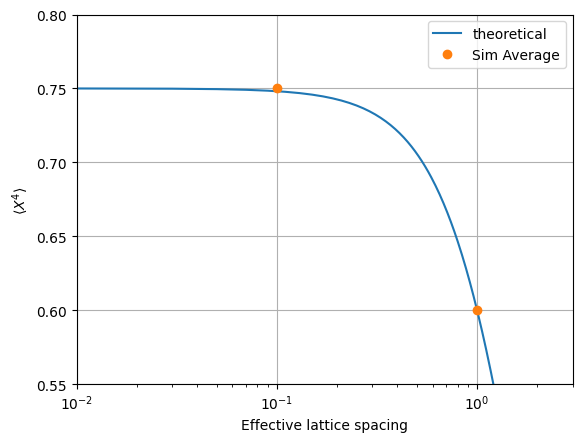

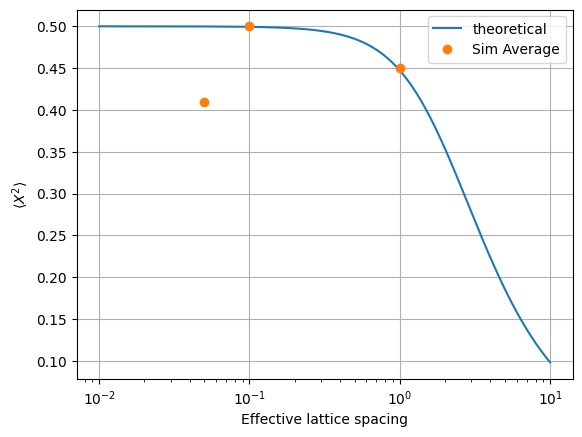

<Figure size 640x480 with 0 Axes>

In [67]:
#elt=np.arange(0.01,1,0.001) #Effective lattice spacing
#Ntcons=np.arange(12000,120)
elt=np.linspace(0.01,10,1000) #Effective lattice spacing
Ntcons=np.linspace(12000,12,1000)
#print(Ntcons)
x2EV=np.zeros(len(elt))
x4EV=np.zeros(len(elt))

for i in range(0,len(elt),1):
  x2EV[i], x4EV[i]=ExpectValX24(Ntcons[i],elt[i],elt[i])
  #print(Ntcons[i],elt[i])

plt.figure(0)
eltdis=[0.05,0.1,1]
x4EVdis=[0.49,0.75,0.6]
plt.plot(elt,x4EV,label="theoretical")
plt.plot(eltdis,x4EVdis,"o",label="Sim Average")
plt.xscale("log")
plt.xlabel("Effective lattice spacing")
plt.ylabel(r"$⟨X^{4}⟩$")
plt.ylim(0.55,0.8)
plt.xlim(10**-2,3)
plt.grid()
plt.legend()
fig.show()

plt.figure(1)
eltdis=[0.05,0.1,1]
x2EVdis=[0.41,0.5,0.45]

plt.plot(elt,x2EV,label="theoretical")
plt.plot(eltdis,x2EVdis,"o",label="Sim Average")
plt.xscale("log")
plt.xlabel("Effective lattice spacing")
plt.ylabel(r"$⟨X^{2}⟩$")
#plt.ylim(0.55,0.8)
#plt.xlim(10**-2,3)
plt.grid()
plt.legend()
plt.show()
plt.savefig("1stgraph.eps")
plt.savefig("1stgraph")
